# Final term project

## Team Name
Micky Kumar
<br>
Iram
<br>
Harold

## Import

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D,GlobalMaxPooling2D,
Flatten, Dense, GlobalAveragePooling2D, Activation, MaxPool2D, AvgPool2D, Dropout, Conv1D, MaxPooling1D
from keras.models import Model
from keras import applications
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras.utils import to_categorical
from numpy import array
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn import preprocessing
from sklearn.utils import shuffle

##  data preparation 

### Project Overview

Based on the COVID-19 Cases dataset from open data toronto, this project will show detail about covid-19 by the Toronto public health. The details include demographic, geographic, and severity information for all confirmed and likely cases. The images for the X-ray is provided by kaggle. The Kaggle link is below:
https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset/


### Research question and problem framing

Based on this dataset, we are trying to predict the outcome based on age. This will allows people to know what age are getting more affected by COVID-19 and how to support them.

<br>
Who: The stakeholders will for this project will be people are creating a medicine for COVID-19, but also everyone will the community. 
<br>

What: In this problem, we are trying to invesigate about COVID-19 and the affect on it
<br>

When: This problem needs to complete as soon as possible because this is affecting everyone daily life and health.
<br>

Where: The COVID-19 is affecting worldwide and it is a worldwide pandemic.


### Types of features

The dataset that is being used are:
<br>
- _id: This created a unique id for the cases that comes in.
- Outbreak Associated: This talks about where the outbreak is occuring in Toronto.
- Age Group: This feature is about age groups for COVID-19
- Neighbourhood Name: This feature talks about Toronto divided into 140 geographically distinct neighborhoods and can be used to understandwhere most cases are coming from
- FSA: This feature creates a unique code based on client postal code and help understand where thae case is occuring.
- Source of Infection: The feature talks aboutbefore symptoms start are potential acquisition sources. this include travels, close contact with a case, institutional setting, healthcare setting, community, pending, unknown/missing, and N/A.
- Classification:The feaure is about categorize the cases as confirmed according to standard criteria
- Episode Date: The feature talks about the date when the symptom occured.
- Reported Date: The feature talks about date on which the case was reported to Toronto Public Health
- Client Gender: The feature that classifies people based on their assigned biological sex
- Outcome: This feature is include fatal(cases with a fatal outcome reported), resolved (case that is more than 14 days or the patient is recoved), Active (All other cases that is remaining)
- Currently Hospitalized: The feature talks about cases that are currently admitted to hospital
- Currently in ICU: The feature is about cases that are currently admitted to the intensive care unit with no discharge date.
- Currently Intubated: The feature is about cases that were intubated. 
- Ever Hospitalized:The feature is about cases that were hospitalized. 
- Ever in ICU: This feature is the cases that were admitted to the intensive care unit (ICU). 
- Ever Intubated: This feature talks about cases that are currently intubated and that have been discharged.

In the Chest_xray_Corona_Metadata.csv, it contains 6 features and 5910 unique values. While the 
Chest_xray_Corona_dataset_Summary.csv has 5 feature and 7 values.

### Explore

In [78]:
covid19 = pd.read_csv('C:/Users/Micky/Downloads/COVID19-cases.csv')
train_df = pd.read_csv('C:/Users/Micky/Documents/GitHub/DL-final-project/Chest-xray/Chest_xray_Corona_Metadata.csv')
test_img_dir = 'C:/Users/Micky/Documents/GitHub/DL-final-project/Chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
train_img_dir = 'C:/Users/Micky/Documents//GitHub/DL-final-project/Chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'


In [79]:
covid19.shape

(14691, 17)

In [4]:
covid19.head()

_id  Outbreak Associated Age Group Neighbourhood Name  FSA  \
0  14692             Sporadic     50-59            Malvern  M1B   
1  14693             Sporadic     20-29            Malvern  M1B   
2  14694             Sporadic     60-69            Malvern  M1B   
3  14695  Outbreak Associated     50-59              Rouge  M1B   
4  14696             Sporadic     30-39              Rouge  M1B   

         Source of Infection Classification Episode Date Reported Date  \
0              Institutional      CONFIRMED   2020-03-25    2020-03-27   
1                  Community      CONFIRMED   2020-03-20    2020-03-28   
2                     Travel      CONFIRMED   2020-03-04    2020-03-08   
3  N/A - Outbreak associated      CONFIRMED   2020-05-02    2020-05-04   
4              Close contact      CONFIRMED   2020-05-31    2020-06-06   

  Client Gender   Outcome Currently Hospitalized Currently in ICU  \
0          MALE  RESOLVED                     No               No   
1          MALE  RESOLVED                     No               No   
2        FEMALE  RESOLVED                     No               No   
3        FEMALE  RESOLVED                     No               No   
4        FEMALE  RESOLVED                     No               No   

  Currently Intubated Ever Hospitalized Ever in ICU Ever Intubated  
0                  No                No          No             No  
1                  No               Yes          No             No  
2                  No               Yes         Yes            Yes  
3                  No                No          No             No  
4                  No                No          No             No

In [5]:
covid19.tail()

_id  Outbreak Associated Age Group Neighbourhood Name  FSA  \
14686  29378  Outbreak Associated     50-59                NaN  NaN   
14687  29379  Outbreak Associated     50-59                NaN  NaN   
14688  29380  Outbreak Associated     20-29                NaN  NaN   
14689  29381  Outbreak Associated     40-49                NaN  NaN   
14690  29382  Outbreak Associated     50-59                NaN  NaN   

             Source of Infection Classification Episode Date Reported Date  \
14686  N/A - Outbreak associated      CONFIRMED   2020-06-02    2020-06-03   
14687  N/A - Outbreak associated      CONFIRMED   2020-06-11    2020-06-15   
14688  N/A - Outbreak associated      CONFIRMED   2020-05-09    2020-05-23   
14689  N/A - Outbreak associated      CONFIRMED   2020-06-18    2020-06-19   
14690  N/A - Outbreak associated      CONFIRMED   2020-06-22    2020-06-23   

      Client Gender   Outcome Currently Hospitalized Currently in ICU  \
14686        FEMALE  RESOLVED                     No               No   
14687        FEMALE  RESOLVED                     No               No   
14688        FEMALE  RESOLVED                     No               No   
14689        FEMALE  RESOLVED                     No               No   
14690        FEMALE    ACTIVE                    Yes               No   

      Currently Intubated Ever Hospitalized Ever in ICU Ever Intubated  
14686                  No                No          No             No  
14687                  No                No          No             No  
14688                  No                No          No             No  
14689                  No                No          No             No  
14690                  No               Yes          No             No

In [6]:
covid19.describe()

_id
count  14691.000000
mean   22037.000000
std     4241.070737
min    14692.000000
25%    18364.500000
50%    22037.000000
75%    25709.500000
max    29382.000000

In [7]:
covid19.head()

_id  Outbreak Associated Age Group Neighbourhood Name  FSA  \
0  14692             Sporadic     50-59            Malvern  M1B   
1  14693             Sporadic     20-29            Malvern  M1B   
2  14694             Sporadic     60-69            Malvern  M1B   
3  14695  Outbreak Associated     50-59              Rouge  M1B   
4  14696             Sporadic     30-39              Rouge  M1B   

         Source of Infection Classification Episode Date Reported Date  \
0              Institutional      CONFIRMED   2020-03-25    2020-03-27   
1                  Community      CONFIRMED   2020-03-20    2020-03-28   
2                     Travel      CONFIRMED   2020-03-04    2020-03-08   
3  N/A - Outbreak associated      CONFIRMED   2020-05-02    2020-05-04   
4              Close contact      CONFIRMED   2020-05-31    2020-06-06   

  Client Gender   Outcome Currently Hospitalized Currently in ICU  \
0          MALE  RESOLVED                     No               No   
1          MALE  RESOLVED                     No               No   
2        FEMALE  RESOLVED                     No               No   
3        FEMALE  RESOLVED                     No               No   
4        FEMALE  RESOLVED                     No               No   

  Currently Intubated Ever Hospitalized Ever in ICU Ever Intubated  
0                  No                No          No             No  
1                  No               Yes          No             No  
2                  No               Yes         Yes            Yes  
3                  No                No          No             No  
4                  No                No          No             No

In [35]:
train_df.head(5)

Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

### Missing Values

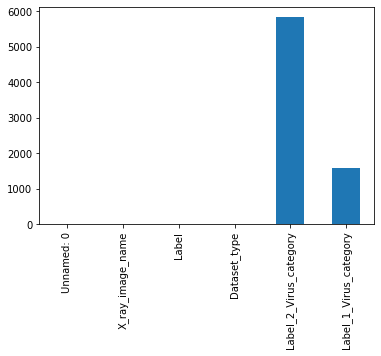

In [36]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [37]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [38]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


Unnamed: 0             X_ray_image_name     Label Dataset_type  \
5484        5507    NORMAL2-IM-0079-0001.jpeg    Normal         TEST   
5295        5318            IM-0010-0001.jpeg    Normal         TEST   
5773        5796   person78_bacteria_386.jpeg  Pnemonia         TEST   
5761        5784   person81_bacteria_398.jpeg  Pnemonia         TEST   
5538        5561   person1613_virus_2799.jpeg  Pnemonia         TEST   
5514        5537    NORMAL2-IM-0343-0001.jpeg    Normal         TEST   
5444        5467    NORMAL2-IM-0221-0001.jpeg    Normal         TEST   
5837        5860       person24_virus_58.jpeg  Pnemonia         TEST   
5641        5664  person124_bacteria_589.jpeg  Pnemonia         TEST   
5879        5902   person1668_virus_2882.jpeg  Pnemonia         TEST   

     Label_2_Virus_category Label_1_Virus_category  
5484                    NaN                    NaN  
5295                    NaN                    NaN  
5773                    NaN               bacteria  
5761                    NaN               bacteria  
5538                    NaN                  Virus  
5514                    NaN                    NaN  
5444                    NaN                    NaN  
5837                    NaN                  Virus  
5641                    NaN               bacteria  
5879                    NaN                  Virus

### View Images

In [77]:

assert os.path.isdir(test_img_dir) == True
assert os.path.isdir(train_img_dir) == True

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))


#### View images from Train

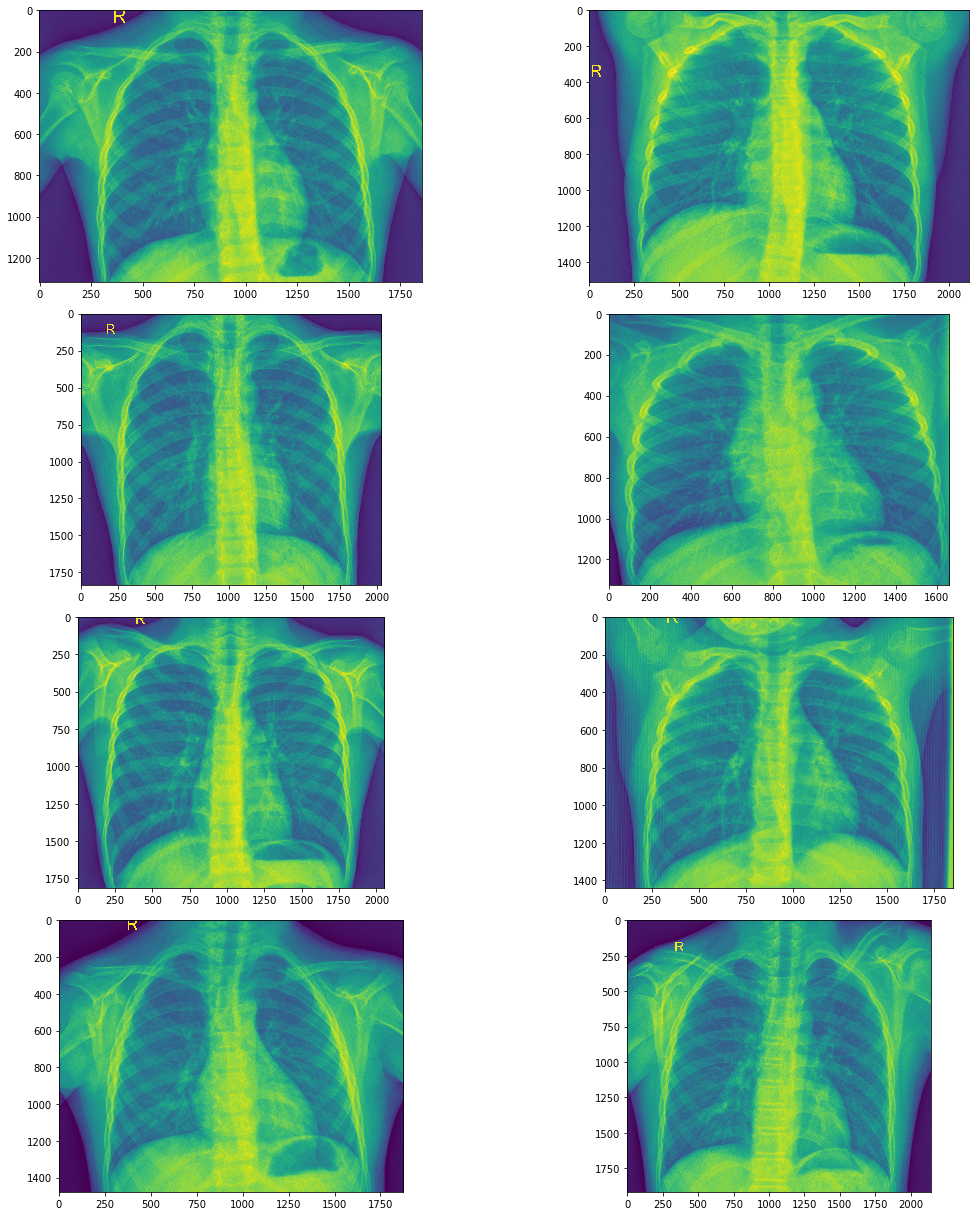

In [46]:
from PIL import Image
plt.figure(figsize = (17,17))
for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image)

plt.tight_layout()

#### View images from Test

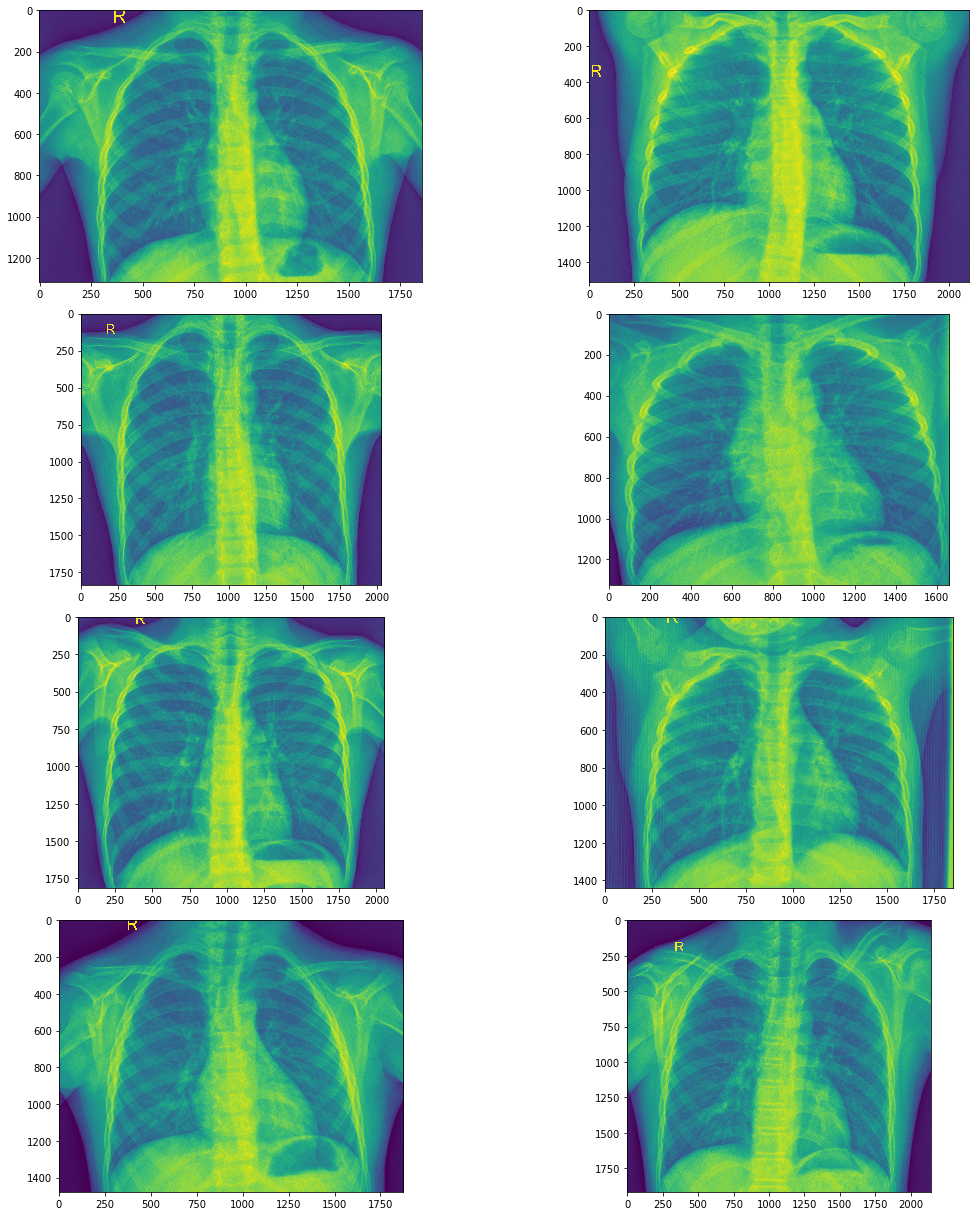

In [48]:
plt.figure(figsize = (17,17))
for iterator, filename in enumerate(sample_test_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image)

plt.tight_layout()


## Use of proper training and test set

In [8]:
# Drop all unwanted columns
# covid19 = covid19.drop('Episode Date',axis = 1)
# covid19 = covid19.drop('Reported Date',axis = 1)

# Create empty data frame
covid19_updated = pd.DataFrame()

# Apply Label Binarizer
lb = LabelBinarizer()
covid19['Outbreak Associated']= lb.fit_transform(covid19['Outbreak Associated']) 
covid19_updated = pd.concat([covid19_updated, covid19['Outbreak Associated']], axis=1)


dummies1 = pd.get_dummies(covid19["Age Group"], prefix='Age_Group')
covid19_updated = pd.concat([covid19_updated, dummies1], axis=1)

dummies2 = pd.get_dummies(covid19["Neighbourhood Name"], prefix='Neighbourhood_Name')
covid19_updated = pd.concat([covid19_updated, dummies2], axis=1)

fsa_dummies = pd.get_dummies(covid19.FSA, prefix='FSA')
covid19_updated = pd.concat([covid19_updated, fsa_dummies], axis=1)

dummies3 = pd.get_dummies(covid19["Source of Infection"], prefix='Source_of_Infection')
covid19_updated = pd.concat([covid19_updated, dummies3], axis=1)

covid19['Classification']= lb.fit_transform(covid19['Classification']) 
covid19_updated = pd.concat([covid19_updated, covid19['Classification']], axis=1)

dummies4 = pd.get_dummies(covid19["Client Gender"], prefix='Client_Gender')
covid19_updated = pd.concat([covid19_updated, dummies4], axis=1)

covid19['Currently Hospitalized']= lb.fit_transform(covid19['Currently Hospitalized']) 
covid19_updated = pd.concat([covid19_updated, covid19['Currently Hospitalized']], axis=1)

covid19['Currently in ICU']= lb.fit_transform(covid19['Currently in ICU']) 
covid19_updated = pd.concat([covid19_updated, covid19['Currently in ICU']], axis=1)

covid19['Currently Intubated']= lb.fit_transform(covid19['Currently Intubated']) 
covid19_updated = pd.concat([covid19_updated, covid19['Currently Intubated']], axis=1)

covid19['Ever Hospitalized']= lb.fit_transform(covid19['Ever Hospitalized']) 
covid19_updated = pd.concat([covid19_updated, covid19['Ever Hospitalized']], axis=1)

covid19['Ever in ICU']= lb.fit_transform(covid19['Ever in ICU']) 
covid19_updated = pd.concat([covid19_updated, covid19['Ever in ICU']], axis=1)

covid19['Ever Intubated']= lb.fit_transform(covid19['Ever Intubated']) 
covid19_updated = pd.concat([covid19_updated, covid19['Ever Intubated']], axis=1)

covid19_updated = pd.concat([covid19_updated, covid19['Outcome']], axis=1)

covid19_updated.Outcome = pd.factorize(covid19_updated.Outcome)[0]
covid19_updated.head()

# covid19_updated.to_csv("drive/My Drive/Final_Project/out.csv")

Outbreak Associated  Age_Group_19 and younger  Age_Group_20-29  \
0                    1                         0                0   
1                    1                         0                1   
2                    1                         0                0   
3                    0                         0                0   
4                    1                         0                0   

   Age_Group_30-39  Age_Group_40-49  Age_Group_50-59  Age_Group_60-69  \
0                0                0                1                0   
1                0                0                0                0   
2                0                0                0                1   
3                0                0                1                0   
4                1                0                0                0   

   Age_Group_70-79  Age_Group_80-89  Age_Group_90+  ...  Client_Gender_OTHER  \
0                0                0              0  ...                    0   
1                0                0              0  ...                    0   
2                0                0              0  ...                    0   
3                0                0              0  ...                    0   
4                0                0              0  ...                    0   

   Client_Gender_TRANSGENDER  Client_Gender_UNKNOWN  Currently Hospitalized  \
0                          0                      0                       0   
1                          0                      0                       0   
2                          0                      0                       0   
3                          0                      0                       0   
4                          0                      0                       0   

   Currently in ICU  Currently Intubated  Ever Hospitalized  Ever in ICU  \
0                 0                    0                  0            0   
1                 0                    0                  1            0   
2                 0                    0                  1            1   
3                 0                    0                  0            0   
4                 0                    0                  0            0   

   Ever Intubated  Outcome  
0               0        0  
1               0        0  
2               1        0  
3               0        0  
4               0        0  

[5 rows x 267 columns]

In [9]:
dataset = covid19_updated.values

X = dataset[:,0:261]
Y = dataset[:,261]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(10283, 261) (2204, 261) (2204, 261) (10283,) (2204,) (2204,)


In [10]:
model = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(261,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
hist_out = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50


185/322 [================>.............] - ETA: 0s - loss: 0.0056 - accuracy: 1.00 - ETA: 29s - loss: 0.0056 - accuracy: 1.000 - ETA: 36s - loss: 0.0055 - accuracy: 1.000 - ETA: 1:00 - loss: 0.0055 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0408 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0349 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0561 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0499 - accuracy: 0.99 - ETA: 58s - loss: 0.0453 - accuracy: 0.9931 - ETA: 58s - loss: 0.0416 - accuracy: 0.993 - ETA: 1:01 - loss: 0.0385 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0360 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0338 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0433 - accuracy: 0.99 - ETA: 59s - loss: 0.0514 - accuracy: 0.9917 - ETA: 59s - loss: 0.0488 - accuracy: 0.992 - ETA: 59s - loss: 0.0554 - accuracy: 0.990 - ETA: 1:01 - loss: 0.0529 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0508 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0489 - accuracy: 0.99 - ETA: 59s - loss: 0.0473 - accuracy: 0.9926 - ETA: 59s - loss: 0.0519 - accura

322/322 [==============================] - ETA: 31s - loss: 0.0163 - accuracy: 0.998 - ETA: 31s - loss: 0.0162 - accuracy: 0.998 - ETA: 30s - loss: 0.0162 - accuracy: 0.998 - ETA: 30s - loss: 0.0161 - accuracy: 0.998 - ETA: 30s - loss: 0.0160 - accuracy: 0.998 - ETA: 30s - loss: 0.0159 - accuracy: 0.998 - ETA: 30s - loss: 0.0159 - accuracy: 0.998 - ETA: 29s - loss: 0.0170 - accuracy: 0.997 - ETA: 29s - loss: 0.0180 - accuracy: 0.997 - ETA: 29s - loss: 0.0179 - accuracy: 0.997 - ETA: 28s - loss: 0.0178 - accuracy: 0.997 - ETA: 28s - loss: 0.0178 - accuracy: 0.997 - ETA: 28s - loss: 0.0177 - accuracy: 0.997 - ETA: 28s - loss: 0.0177 - accuracy: 0.997 - ETA: 28s - loss: 0.0176 - accuracy: 0.997 - ETA: 27s - loss: 0.0175 - accuracy: 0.997 - ETA: 27s - loss: 0.0175 - accuracy: 0.997 - ETA: 27s - loss: 0.0174 - accuracy: 0.997 - ETA: 27s - loss: 0.0173 - accuracy: 0.997 - ETA: 26s - loss: 0.0173 - accuracy: 0.997 - ETA: 26s - loss: 0.0172 - accuracy: 0.997 - ETA: 26s - loss: 0.0181 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0054 - accuracy: 1.00 - ETA: 34s - loss: 0.0053 - accuracy: 1.000 - ETA: 49s - loss: 0.0052 - accuracy: 1.000 - ETA: 54s - loss: 0.0050 - accuracy: 1.000 - ETA: 57s - loss: 0.0049 - accuracy: 1.000 - ETA: 1:12 - loss: 0.0047 - accuracy: 1.00 - ETA: 1:08 - loss: 0.0046 - accuracy: 1.00 - ETA: 1:19 - loss: 0.0299 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0270 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0248 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0229 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0214 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0201 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0190 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0181 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0172 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0281 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0268 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0257 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0246 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0237 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0228 - accuracy

322/322 [==============================] - ETA: 49s - loss: 0.0261 - accuracy: 0.996 - ETA: 49s - loss: 0.0260 - accuracy: 0.996 - ETA: 48s - loss: 0.0259 - accuracy: 0.996 - ETA: 48s - loss: 0.0258 - accuracy: 0.996 - ETA: 47s - loss: 0.0257 - accuracy: 0.996 - ETA: 47s - loss: 0.0256 - accuracy: 0.996 - ETA: 46s - loss: 0.0255 - accuracy: 0.996 - ETA: 46s - loss: 0.0254 - accuracy: 0.996 - ETA: 46s - loss: 0.0253 - accuracy: 0.996 - ETA: 45s - loss: 0.0251 - accuracy: 0.996 - ETA: 45s - loss: 0.0250 - accuracy: 0.996 - ETA: 45s - loss: 0.0249 - accuracy: 0.996 - ETA: 44s - loss: 0.0248 - accuracy: 0.996 - ETA: 44s - loss: 0.0247 - accuracy: 0.996 - ETA: 43s - loss: 0.0246 - accuracy: 0.996 - ETA: 43s - loss: 0.0245 - accuracy: 0.996 - ETA: 43s - loss: 0.0244 - accuracy: 0.996 - ETA: 42s - loss: 0.0243 - accuracy: 0.996 - ETA: 42s - loss: 0.0242 - accuracy: 0.996 - ETA: 41s - loss: 0.0241 - accuracy: 0.996 - ETA: 41s - loss: 0.0240 - accuracy: 0.996 - ETA: 40s - loss: 0.0239 - accurac

 94/322 [=======>......................] - ETA: 0s - loss: 0.0027 - accuracy: 1.00 - ETA: 41s - loss: 0.0027 - accuracy: 1.000 - ETA: 57s - loss: 0.0757 - accuracy: 0.989 - ETA: 57s - loss: 0.0575 - accuracy: 0.992 - ETA: 54s - loss: 0.0467 - accuracy: 0.993 - ETA: 53s - loss: 0.0395 - accuracy: 0.994 - ETA: 1:00 - loss: 0.0345 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0306 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0500 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0454 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0595 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0551 - accuracy: 0.99 - ETA: 58s - loss: 0.0515 - accuracy: 0.9928 - ETA: 56s - loss: 0.0484 - accuracy: 0.993 - ETA: 57s - loss: 0.0456 - accuracy: 0.993 - ETA: 1:06 - loss: 0.0432 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0410 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0391 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0373 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0357 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0343 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0330 - accurac

280/322 [=========================>....] - ETA: 52s - loss: 0.0194 - accuracy: 0.997 - ETA: 52s - loss: 0.0193 - accuracy: 0.997 - ETA: 52s - loss: 0.0191 - accuracy: 0.997 - ETA: 52s - loss: 0.0189 - accuracy: 0.997 - ETA: 52s - loss: 0.0188 - accuracy: 0.997 - ETA: 51s - loss: 0.0186 - accuracy: 0.997 - ETA: 51s - loss: 0.0184 - accuracy: 0.997 - ETA: 50s - loss: 0.0183 - accuracy: 0.997 - ETA: 51s - loss: 0.0181 - accuracy: 0.997 - ETA: 50s - loss: 0.0201 - accuracy: 0.997 - ETA: 50s - loss: 0.0199 - accuracy: 0.997 - ETA: 50s - loss: 0.0198 - accuracy: 0.997 - ETA: 49s - loss: 0.0196 - accuracy: 0.997 - ETA: 49s - loss: 0.0195 - accuracy: 0.997 - ETA: 49s - loss: 0.0193 - accuracy: 0.997 - ETA: 48s - loss: 0.0192 - accuracy: 0.997 - ETA: 49s - loss: 0.0190 - accuracy: 0.997 - ETA: 48s - loss: 0.0189 - accuracy: 0.997 - ETA: 48s - loss: 0.0187 - accuracy: 0.997 - ETA: 48s - loss: 0.0186 - accuracy: 0.997 - ETA: 48s - loss: 0.0185 - accuracy: 0.997 - ETA: 48s - loss: 0.0183 - accurac

322/322 [==============================] - ETA: 9s - loss: 0.0202 - accuracy: 0.99 - ETA: 9s - loss: 0.0202 - accuracy: 0.99 - ETA: 8s - loss: 0.0209 - accuracy: 0.99 - ETA: 8s - loss: 0.0216 - accuracy: 0.99 - ETA: 8s - loss: 0.0215 - accuracy: 0.99 - ETA: 8s - loss: 0.0214 - accuracy: 0.99 - ETA: 7s - loss: 0.0214 - accuracy: 0.99 - ETA: 7s - loss: 0.0213 - accuracy: 0.99 - ETA: 7s - loss: 0.0213 - accuracy: 0.99 - ETA: 7s - loss: 0.0212 - accuracy: 0.99 - ETA: 7s - loss: 0.0212 - accuracy: 0.99 - ETA: 6s - loss: 0.0211 - accuracy: 0.99 - ETA: 6s - loss: 0.0210 - accuracy: 0.99 - ETA: 6s - loss: 0.0210 - accuracy: 0.99 - ETA: 6s - loss: 0.0209 - accuracy: 0.99 - ETA: 5s - loss: 0.0209 - accuracy: 0.99 - ETA: 5s - loss: 0.0214 - accuracy: 0.99 - ETA: 5s - loss: 0.0214 - accuracy: 0.99 - ETA: 5s - loss: 0.0213 - accuracy: 0.99 - ETA: 5s - loss: 0.0213 - accuracy: 0.99 - ETA: 4s - loss: 0.0212 - accuracy: 0.99 - ETA: 4s - loss: 0.0212 - accuracy: 0.99 - ETA: 4s - loss: 0.0211 - accuracy

186/322 [================>.............] - ETA: 0s - loss: 0.0033 - accuracy: 1.00 - ETA: 41s - loss: 0.1049 - accuracy: 0.984 - ETA: 57s - loss: 0.0711 - accuracy: 0.989 - ETA: 1:04 - loss: 0.0543 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0442 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0375 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0327 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0533 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0479 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0436 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0401 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0371 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0346 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0325 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0306 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0290 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0275 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0262 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0251 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0240 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0231 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0222 - accuracy

322/322 [==============================] - ETA: 42s - loss: 0.0196 - accuracy: 0.997 - ETA: 41s - loss: 0.0195 - accuracy: 0.997 - ETA: 41s - loss: 0.0194 - accuracy: 0.997 - ETA: 41s - loss: 0.0194 - accuracy: 0.997 - ETA: 40s - loss: 0.0202 - accuracy: 0.997 - ETA: 40s - loss: 0.0201 - accuracy: 0.997 - ETA: 39s - loss: 0.0201 - accuracy: 0.997 - ETA: 39s - loss: 0.0200 - accuracy: 0.997 - ETA: 39s - loss: 0.0199 - accuracy: 0.997 - ETA: 38s - loss: 0.0207 - accuracy: 0.997 - ETA: 38s - loss: 0.0207 - accuracy: 0.997 - ETA: 38s - loss: 0.0206 - accuracy: 0.997 - ETA: 37s - loss: 0.0205 - accuracy: 0.997 - ETA: 37s - loss: 0.0213 - accuracy: 0.997 - ETA: 37s - loss: 0.0212 - accuracy: 0.997 - ETA: 37s - loss: 0.0211 - accuracy: 0.997 - ETA: 36s - loss: 0.0211 - accuracy: 0.997 - ETA: 36s - loss: 0.0210 - accuracy: 0.997 - ETA: 36s - loss: 0.0209 - accuracy: 0.997 - ETA: 36s - loss: 0.0209 - accuracy: 0.997 - ETA: 35s - loss: 0.0208 - accuracy: 0.997 - ETA: 35s - loss: 0.0208 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0041 - accuracy: 1.00 - ETA: 25s - loss: 0.0040 - accuracy: 1.000 - ETA: 39s - loss: 0.0040 - accuracy: 1.000 - ETA: 43s - loss: 0.0509 - accuracy: 0.992 - ETA: 52s - loss: 0.0415 - accuracy: 0.993 - ETA: 1:05 - loss: 0.0353 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0309 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0465 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0424 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0390 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0363 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0340 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0320 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0303 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0274 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0262 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0251 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0241 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0232 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0224 - accuracy

322/322 [==============================] - ETA: 39s - loss: 0.0212 - accuracy: 0.997 - ETA: 39s - loss: 0.0212 - accuracy: 0.997 - ETA: 39s - loss: 0.0211 - accuracy: 0.997 - ETA: 38s - loss: 0.0210 - accuracy: 0.997 - ETA: 38s - loss: 0.0227 - accuracy: 0.997 - ETA: 38s - loss: 0.0226 - accuracy: 0.997 - ETA: 38s - loss: 0.0225 - accuracy: 0.997 - ETA: 37s - loss: 0.0224 - accuracy: 0.997 - ETA: 37s - loss: 0.0232 - accuracy: 0.997 - ETA: 37s - loss: 0.0231 - accuracy: 0.997 - ETA: 36s - loss: 0.0230 - accuracy: 0.997 - ETA: 36s - loss: 0.0230 - accuracy: 0.997 - ETA: 36s - loss: 0.0237 - accuracy: 0.996 - ETA: 35s - loss: 0.0236 - accuracy: 0.996 - ETA: 35s - loss: 0.0235 - accuracy: 0.996 - ETA: 35s - loss: 0.0235 - accuracy: 0.996 - ETA: 35s - loss: 0.0234 - accuracy: 0.996 - ETA: 34s - loss: 0.0233 - accuracy: 0.996 - ETA: 34s - loss: 0.0240 - accuracy: 0.996 - ETA: 34s - loss: 0.0239 - accuracy: 0.996 - ETA: 33s - loss: 0.0238 - accuracy: 0.996 - ETA: 33s - loss: 0.0238 - accurac

 83/322 [======>.......................] - ETA: 3:12 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0088 - accuracy: 0.9992WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.274070). Check your callbacks.


269/322 [========================>.....] - ETA: 3:06 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0113 - accuracy: 0.99 - ETA: 3:01 - loss: 0.0112 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0111 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0110 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0110 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0109 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0108 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0107 - accuracy: 0.99 - ETA: 2:50 - loss: 0.0106 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0106 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0105 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0104 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0103 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0103 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0102 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0101 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0141 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0140 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0139 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0138 - accura

322/322 [==============================] - ETA: 25s - loss: 0.0203 - accuracy: 0.997 - ETA: 24s - loss: 0.0203 - accuracy: 0.997 - ETA: 24s - loss: 0.0203 - accuracy: 0.997 - ETA: 23s - loss: 0.0202 - accuracy: 0.997 - ETA: 23s - loss: 0.0202 - accuracy: 0.997 - ETA: 22s - loss: 0.0202 - accuracy: 0.997 - ETA: 22s - loss: 0.0201 - accuracy: 0.997 - ETA: 21s - loss: 0.0201 - accuracy: 0.997 - ETA: 21s - loss: 0.0200 - accuracy: 0.997 - ETA: 20s - loss: 0.0200 - accuracy: 0.997 - ETA: 20s - loss: 0.0200 - accuracy: 0.997 - ETA: 19s - loss: 0.0199 - accuracy: 0.997 - ETA: 19s - loss: 0.0199 - accuracy: 0.997 - ETA: 18s - loss: 0.0198 - accuracy: 0.997 - ETA: 18s - loss: 0.0198 - accuracy: 0.997 - ETA: 17s - loss: 0.0197 - accuracy: 0.997 - ETA: 17s - loss: 0.0197 - accuracy: 0.997 - ETA: 16s - loss: 0.0196 - accuracy: 0.997 - ETA: 16s - loss: 0.0196 - accuracy: 0.997 - ETA: 15s - loss: 0.0195 - accuracy: 0.997 - ETA: 15s - loss: 0.0194 - accuracy: 0.997 - ETA: 14s - loss: 0.0194 - accurac

256/322 [======================>.......] - ETA: 0s - loss: 0.0058 - accuracy: 1.00 - ETA: 25s - loss: 0.0056 - accuracy: 1.000 - ETA: 37s - loss: 0.0056 - accuracy: 1.000 - ETA: 45s - loss: 0.0055 - accuracy: 1.000 - ETA: 59s - loss: 0.0054 - accuracy: 1.000 - ETA: 1:11 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:08 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:05 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0050 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0050 - accuracy: 1.00 - ETA: 1:04 - loss: 0.0049 - accuracy: 1.00 - ETA: 1:04 - loss: 0.0048 - accuracy: 1.00 - ETA: 1:05 - loss: 0.0047 - accuracy: 1.00 - ETA: 1:05 - loss: 0.0047 - accuracy: 1.00 - ETA: 1:08 - loss: 0.0046 - accuracy: 1.00 - ETA: 1:08 - loss: 0.0046 - accuracy: 1.00 - ETA: 1:16 - loss: 0.0045 - accuracy: 1.00 - ETA: 1:17 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:16 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:17 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:19 - loss: 0.0043 - accuracy

322/322 [==============================] - ETA: 13s - loss: 0.0183 - accuracy: 0.997 - ETA: 13s - loss: 0.0183 - accuracy: 0.997 - ETA: 13s - loss: 0.0182 - accuracy: 0.997 - ETA: 13s - loss: 0.0182 - accuracy: 0.997 - ETA: 12s - loss: 0.0187 - accuracy: 0.997 - ETA: 12s - loss: 0.0187 - accuracy: 0.997 - ETA: 12s - loss: 0.0187 - accuracy: 0.997 - ETA: 12s - loss: 0.0186 - accuracy: 0.997 - ETA: 11s - loss: 0.0186 - accuracy: 0.997 - ETA: 11s - loss: 0.0185 - accuracy: 0.997 - ETA: 11s - loss: 0.0185 - accuracy: 0.997 - ETA: 11s - loss: 0.0185 - accuracy: 0.997 - ETA: 11s - loss: 0.0184 - accuracy: 0.997 - ETA: 11s - loss: 0.0184 - accuracy: 0.997 - ETA: 10s - loss: 0.0183 - accuracy: 0.997 - ETA: 10s - loss: 0.0183 - accuracy: 0.997 - ETA: 10s - loss: 0.0182 - accuracy: 0.997 - ETA: 10s - loss: 0.0182 - accuracy: 0.997 - ETA: 10s - loss: 0.0181 - accuracy: 0.997 - ETA: 9s - loss: 0.0181 - accuracy: 0.997 - ETA: 9s - loss: 0.0187 - accuracy: 0.99 - ETA: 9s - loss: 0.0187 - accuracy: 0

186/322 [================>.............] - ETA: 0s - loss: 0.2096 - accuracy: 0.96 - ETA: 33s - loss: 0.2021 - accuracy: 0.968 - ETA: 42s - loss: 0.1362 - accuracy: 0.979 - ETA: 51s - loss: 0.1035 - accuracy: 0.984 - ETA: 57s - loss: 0.0840 - accuracy: 0.987 - ETA: 1:04 - loss: 0.0710 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0617 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0547 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0493 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0449 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0413 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0382 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0502 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0594 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0559 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0528 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0501 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0478 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0438 - accuracy: 0.99 - ETA: 59s - loss: 0.0421 - accuracy: 0.9940 - ETA: 58s - loss: 0.0406 - accuracy

322/322 [==============================] - ETA: 38s - loss: 0.0178 - accuracy: 0.997 - ETA: 38s - loss: 0.0177 - accuracy: 0.997 - ETA: 37s - loss: 0.0176 - accuracy: 0.997 - ETA: 37s - loss: 0.0176 - accuracy: 0.997 - ETA: 37s - loss: 0.0175 - accuracy: 0.997 - ETA: 37s - loss: 0.0184 - accuracy: 0.997 - ETA: 37s - loss: 0.0183 - accuracy: 0.997 - ETA: 36s - loss: 0.0183 - accuracy: 0.997 - ETA: 36s - loss: 0.0182 - accuracy: 0.997 - ETA: 36s - loss: 0.0181 - accuracy: 0.997 - ETA: 36s - loss: 0.0181 - accuracy: 0.997 - ETA: 35s - loss: 0.0180 - accuracy: 0.997 - ETA: 35s - loss: 0.0180 - accuracy: 0.997 - ETA: 35s - loss: 0.0179 - accuracy: 0.997 - ETA: 35s - loss: 0.0187 - accuracy: 0.997 - ETA: 34s - loss: 0.0186 - accuracy: 0.997 - ETA: 34s - loss: 0.0186 - accuracy: 0.997 - ETA: 34s - loss: 0.0185 - accuracy: 0.997 - ETA: 34s - loss: 0.0184 - accuracy: 0.997 - ETA: 33s - loss: 0.0184 - accuracy: 0.997 - ETA: 33s - loss: 0.0192 - accuracy: 0.997 - ETA: 33s - loss: 0.0191 - accurac

135/322 [===========>..................] - ETA: 0s - loss: 0.0052 - accuracy: 1.00 - ETA: 1:06 - loss: 0.0054 - accuracy: 1.00 - ETA: 1:20 - loss: 0.0054 - accuracy: 1.00 - ETA: 1:28 - loss: 0.0054 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0054 - accuracy: 1.00 - ETA: 1:29 - loss: 0.0054 - accuracy: 1.00 - ETA: 1:23 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:19 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:26 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:33 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:33 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:31 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:31 - loss: 0.0050 - accuracy: 1.00 - ETA: 1:33 - loss: 0.0049 - accuracy: 1.00 - ETA: 1:39 - loss: 0.0049 - accuracy: 1.00 - ETA: 1:40 - loss: 0.0048 - accuracy: 1.00 - ETA: 1:38 - loss: 0.0048 - accuracy: 1.00 - ETA: 1:35 - loss: 0.0047 - accuracy: 1.00 - ETA: 1:32 - loss: 0.0047 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0046 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0045 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0045 - accuracy

254/322 [======================>.......] - ETA: 1:02 - loss: 0.0160 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0160 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0159 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0156 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0155 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0154 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0154 - accuracy: 0.99 - ETA: 59s - loss: 0.0153 - accuracy: 0.9983 - ETA: 59s - loss: 0.0152 - accuracy: 0.998 - ETA: 58s - loss: 0.0151 - accuracy: 0.998 - ETA: 58s - loss: 0.0151 - accuracy: 0.998 - ETA: 58s - loss: 0.0150 - accuracy: 0.998 - ETA: 57s - loss: 0.0149 - accuracy: 0.998 - ETA: 57s - loss: 0.0148 - accuracy: 0.998 - ETA: 57s - loss: 0.0148 - accuracy: 0.998 - ETA: 56s - loss: 0.0147 - accuracy: 0.998 - ETA: 56s - loss: 0.0159 - accuracy: 0.998 - ETA: 55s - loss: 0.0159 - accuracy: 0.998 - ETA: 55s - loss: 0.0158 - accura

322/322 [==============================] - ETA: 29s - loss: 0.0174 - accuracy: 0.997 - ETA: 29s - loss: 0.0174 - accuracy: 0.997 - ETA: 28s - loss: 0.0173 - accuracy: 0.997 - ETA: 28s - loss: 0.0173 - accuracy: 0.997 - ETA: 28s - loss: 0.0179 - accuracy: 0.997 - ETA: 27s - loss: 0.0178 - accuracy: 0.997 - ETA: 27s - loss: 0.0178 - accuracy: 0.997 - ETA: 26s - loss: 0.0177 - accuracy: 0.997 - ETA: 26s - loss: 0.0184 - accuracy: 0.997 - ETA: 25s - loss: 0.0183 - accuracy: 0.997 - ETA: 25s - loss: 0.0183 - accuracy: 0.997 - ETA: 25s - loss: 0.0183 - accuracy: 0.997 - ETA: 24s - loss: 0.0182 - accuracy: 0.997 - ETA: 24s - loss: 0.0182 - accuracy: 0.997 - ETA: 23s - loss: 0.0181 - accuracy: 0.997 - ETA: 23s - loss: 0.0181 - accuracy: 0.997 - ETA: 22s - loss: 0.0181 - accuracy: 0.997 - ETA: 22s - loss: 0.0180 - accuracy: 0.997 - ETA: 22s - loss: 0.0180 - accuracy: 0.997 - ETA: 21s - loss: 0.0179 - accuracy: 0.997 - ETA: 21s - loss: 0.0179 - accuracy: 0.997 - ETA: 20s - loss: 0.0178 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0049 - accuracy: 1.00 - ETA: 1:22 - loss: 0.0048 - accuracy: 1.00 - ETA: 2:07 - loss: 0.0048 - accuracy: 1.00 - ETA: 2:08 - loss: 0.0047 - accuracy: 1.00 - ETA: 1:57 - loss: 0.0046 - accuracy: 1.00 - ETA: 1:57 - loss: 0.0045 - accuracy: 1.00 - ETA: 2:01 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:57 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:54 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0042 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0040 - accuracy: 1.00 - ETA: 1:53 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:53 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:51 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:49 - loss: 0.0153 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0147 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0240 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0222 - accuracy

322/322 [==============================] - ETA: 23s - loss: 0.0203 - accuracy: 0.997 - ETA: 22s - loss: 0.0202 - accuracy: 0.997 - ETA: 22s - loss: 0.0201 - accuracy: 0.997 - ETA: 21s - loss: 0.0201 - accuracy: 0.997 - ETA: 21s - loss: 0.0200 - accuracy: 0.997 - ETA: 20s - loss: 0.0200 - accuracy: 0.997 - ETA: 20s - loss: 0.0199 - accuracy: 0.997 - ETA: 19s - loss: 0.0198 - accuracy: 0.997 - ETA: 19s - loss: 0.0198 - accuracy: 0.997 - ETA: 19s - loss: 0.0197 - accuracy: 0.997 - ETA: 18s - loss: 0.0197 - accuracy: 0.997 - ETA: 18s - loss: 0.0196 - accuracy: 0.997 - ETA: 17s - loss: 0.0196 - accuracy: 0.997 - ETA: 17s - loss: 0.0201 - accuracy: 0.997 - ETA: 16s - loss: 0.0201 - accuracy: 0.997 - ETA: 16s - loss: 0.0200 - accuracy: 0.997 - ETA: 15s - loss: 0.0200 - accuracy: 0.997 - ETA: 15s - loss: 0.0199 - accuracy: 0.997 - ETA: 15s - loss: 0.0199 - accuracy: 0.997 - ETA: 14s - loss: 0.0198 - accuracy: 0.997 - ETA: 14s - loss: 0.0198 - accuracy: 0.997 - ETA: 13s - loss: 0.0197 - accurac

 82/322 [======>.......................] - ETA: 2:07 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0239 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0221 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0206 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0194 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0174 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0166 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0266 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0254 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0243 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0234 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0225 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0217 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0210 - accuracy: 0.99 - ETA: 2:51 - loss: 0.0203 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0197 - accuracy: 0.99 - ETA: 2:51 - loss: 0.0191 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0186 - accuracy: 0.99 - ETA: 3:01 - loss: 0.0181 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0176 - accuracy: 0.99 - ETA: 3:01 - loss: 0.0172 - accura

268/322 [=======================>......] - ETA: 3:18 - loss: 0.0182 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0180 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0179 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0177 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0176 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0174 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0173 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0171 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0170 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0168 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0167 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0166 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0164 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0163 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0161 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0181 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0180 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0178 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0177 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0175 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0174 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0173 - accura

322/322 [==============================] - ETA: 13s - loss: 0.0162 - accuracy: 0.998 - ETA: 13s - loss: 0.0167 - accuracy: 0.997 - ETA: 12s - loss: 0.0173 - accuracy: 0.997 - ETA: 12s - loss: 0.0173 - accuracy: 0.997 - ETA: 11s - loss: 0.0172 - accuracy: 0.997 - ETA: 11s - loss: 0.0172 - accuracy: 0.997 - ETA: 10s - loss: 0.0172 - accuracy: 0.997 - ETA: 9s - loss: 0.0171 - accuracy: 0.997 - ETA: 9s - loss: 0.0181 - accuracy: 0.99 - ETA: 8s - loss: 0.0181 - accuracy: 0.99 - ETA: 8s - loss: 0.0181 - accuracy: 0.99 - ETA: 7s - loss: 0.0180 - accuracy: 0.99 - ETA: 6s - loss: 0.0180 - accuracy: 0.99 - ETA: 6s - loss: 0.0180 - accuracy: 0.99 - ETA: 5s - loss: 0.0180 - accuracy: 0.99 - ETA: 5s - loss: 0.0180 - accuracy: 0.99 - ETA: 4s - loss: 0.0179 - accuracy: 0.99 - ETA: 4s - loss: 0.0179 - accuracy: 0.99 - ETA: 3s - loss: 0.0179 - accuracy: 0.99 - ETA: 2s - loss: 0.0183 - accuracy: 0.99 - ETA: 2s - loss: 0.0183 - accuracy: 0.99 - ETA: 1s - loss: 0.0183 - accuracy: 0.99 - ETA: 1s - loss: 0.

186/322 [================>.............] - ETA: 0s - loss: 0.0118 - accuracy: 1.00 - ETA: 1:03 - loss: 0.0132 - accuracy: 1.00 - ETA: 1:29 - loss: 0.0145 - accuracy: 1.00 - ETA: 1:57 - loss: 0.0154 - accuracy: 1.00 - ETA: 2:05 - loss: 0.0428 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0390 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0362 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0341 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0323 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0307 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0292 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0278 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0265 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0253 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0242 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0232 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0222 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0214 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0205 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0294 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0283 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0273 - accuracy

322/322 [==============================] - ETA: 1:08 - loss: 0.0204 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0203 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0202 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0202 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0210 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0209 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0208 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0208 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0207 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0206 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0205 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0205 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0204 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0203 - accuracy: 0.99 - ETA: 59s - loss: 0.0202 - accuracy: 0.9975 - ETA: 58s - loss: 0.0202 - accuracy: 0.997 - ETA: 58s - loss: 0.0201 - accuracy: 0.997 - ETA: 57s - loss: 0.0200 - accuracy: 0.997 - ETA: 57s - loss: 0.0199 - accuracy: 0.997 - ETA: 56s - loss: 0.0198 - accuracy: 0.997 - ETA: 55s - loss: 0.0198 - accuracy: 0.997 - ETA: 55s - loss: 0.0197 - accura

186/322 [================>.............] - ETA: 0s - loss: 0.0060 - accuracy: 1.00 - ETA: 28s - loss: 0.0057 - accuracy: 1.000 - ETA: 1:05 - loss: 0.0055 - accuracy: 1.00 - ETA: 1:14 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:17 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:17 - loss: 0.0049 - accuracy: 1.00 - ETA: 1:13 - loss: 0.0048 - accuracy: 1.00 - ETA: 1:10 - loss: 0.0046 - accuracy: 1.00 - ETA: 1:25 - loss: 0.0045 - accuracy: 1.00 - ETA: 1:25 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:22 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:19 - loss: 0.0042 - accuracy: 1.00 - ETA: 1:16 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:16 - loss: 0.0040 - accuracy: 1.00 - ETA: 1:18 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:17 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:14 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:12 - loss: 0.0037 - accuracy: 1.00 - ETA: 1:11 - loss: 0.0037 - accuracy: 1.00 - ETA: 1:10 - loss: 0.0036 - accuracy: 1.00 - ETA: 1:09 - loss: 0.0036 - accuracy: 1.00 - ETA: 1:12 - loss: 0.0035 - accuracy

322/322 [==============================] - ETA: 34s - loss: 0.0201 - accuracy: 0.997 - ETA: 33s - loss: 0.0200 - accuracy: 0.997 - ETA: 33s - loss: 0.0199 - accuracy: 0.997 - ETA: 33s - loss: 0.0208 - accuracy: 0.997 - ETA: 33s - loss: 0.0208 - accuracy: 0.997 - ETA: 32s - loss: 0.0207 - accuracy: 0.997 - ETA: 32s - loss: 0.0215 - accuracy: 0.997 - ETA: 32s - loss: 0.0214 - accuracy: 0.997 - ETA: 31s - loss: 0.0214 - accuracy: 0.997 - ETA: 31s - loss: 0.0213 - accuracy: 0.997 - ETA: 31s - loss: 0.0212 - accuracy: 0.997 - ETA: 30s - loss: 0.0211 - accuracy: 0.997 - ETA: 30s - loss: 0.0211 - accuracy: 0.997 - ETA: 30s - loss: 0.0210 - accuracy: 0.997 - ETA: 30s - loss: 0.0209 - accuracy: 0.997 - ETA: 29s - loss: 0.0208 - accuracy: 0.997 - ETA: 29s - loss: 0.0208 - accuracy: 0.997 - ETA: 29s - loss: 0.0207 - accuracy: 0.997 - ETA: 28s - loss: 0.0206 - accuracy: 0.997 - ETA: 28s - loss: 0.0205 - accuracy: 0.997 - ETA: 28s - loss: 0.0205 - accuracy: 0.997 - ETA: 28s - loss: 0.0204 - accurac

 48/322 [===>..........................] - ETA: 0s - loss: 0.0091 - accuracy: 1.00 - ETA: 47s - loss: 0.0092 - accuracy: 1.000 - ETA: 1:16 - loss: 0.0089 - accuracy: 1.00 - ETA: 1:16 - loss: 0.0084 - accuracy: 1.00 - ETA: 1:10 - loss: 0.0080 - accuracy: 1.00 - ETA: 1:05 - loss: 0.0076 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0074 - accuracy: 1.00 - ETA: 59s - loss: 0.0072 - accuracy: 1.0000 - ETA: 57s - loss: 0.0071 - accuracy: 1.000 - ETA: 1:02 - loss: 0.0070 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0069 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0068 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0067 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0066 - accuracy: 1.00 - ETA: 59s - loss: 0.0065 - accuracy: 1.0000 - ETA: 1:03 - loss: 0.0064 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0174 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0167 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0161 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0156 - accuracy: 0.99 - ETA: 59s - loss: 0.0151 - accuracy: 0.9985 - ETA: 59s - loss: 0.0147 - accura

234/322 [====================>.........] - ETA: 1:15 - loss: 0.0165 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0163 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0161 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0156 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0154 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0152 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0149 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0147 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0173 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0171 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0169 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0167 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0165 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0163 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0161 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0159 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0156 - accura

322/322 [==============================] - ETA: 37s - loss: 0.0208 - accuracy: 0.997 - ETA: 36s - loss: 0.0207 - accuracy: 0.997 - ETA: 36s - loss: 0.0207 - accuracy: 0.997 - ETA: 35s - loss: 0.0206 - accuracy: 0.997 - ETA: 35s - loss: 0.0205 - accuracy: 0.997 - ETA: 34s - loss: 0.0204 - accuracy: 0.997 - ETA: 34s - loss: 0.0212 - accuracy: 0.997 - ETA: 33s - loss: 0.0211 - accuracy: 0.997 - ETA: 33s - loss: 0.0210 - accuracy: 0.997 - ETA: 32s - loss: 0.0210 - accuracy: 0.997 - ETA: 32s - loss: 0.0209 - accuracy: 0.997 - ETA: 31s - loss: 0.0208 - accuracy: 0.997 - ETA: 31s - loss: 0.0208 - accuracy: 0.997 - ETA: 30s - loss: 0.0207 - accuracy: 0.997 - ETA: 30s - loss: 0.0206 - accuracy: 0.997 - ETA: 29s - loss: 0.0213 - accuracy: 0.997 - ETA: 29s - loss: 0.0212 - accuracy: 0.997 - ETA: 28s - loss: 0.0212 - accuracy: 0.997 - ETA: 28s - loss: 0.0211 - accuracy: 0.997 - ETA: 28s - loss: 0.0210 - accuracy: 0.997 - ETA: 27s - loss: 0.0210 - accuracy: 0.997 - ETA: 27s - loss: 0.0209 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0053 - accuracy: 1.00 - ETA: 54s - loss: 0.0054 - accuracy: 1.000 - ETA: 1:32 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:39 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:36 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:35 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:47 - loss: 0.0050 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0280 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0255 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0234 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0217 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0204 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0192 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0182 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0173 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0165 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0152 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0146 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0136 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0132 - accuracy

124/322 [==========>...................] - ETA: 22s - loss: 0.0186 - accuracy: 0.997 - ETA: 22s - loss: 0.0185 - accuracy: 0.997 - ETA: 22s - loss: 0.0184 - accuracy: 0.997 - ETA: 22s - loss: 0.0183 - accuracy: 0.997 - ETA: 22s - loss: 0.0183 - accuracy: 0.997 - ETA: 21s - loss: 0.0182 - accuracy: 0.997 - ETA: 21s - loss: 0.0181 - accuracy: 0.997 - ETA: 21s - loss: 0.0180 - accuracy: 0.997 - ETA: 21s - loss: 0.0190 - accuracy: 0.997 - ETA: 21s - loss: 0.0189 - accuracy: 0.997 - ETA: 21s - loss: 0.0188 - accuracy: 0.997 - ETA: 20s - loss: 0.0188 - accuracy: 0.997 - ETA: 20s - loss: 0.0187 - accuracy: 0.997 - ETA: 20s - loss: 0.0186 - accuracy: 0.997 - ETA: 20s - loss: 0.0185 - accuracy: 0.997 - ETA: 20s - loss: 0.0184 - accuracy: 0.997 - ETA: 20s - loss: 0.0184 - accuracy: 0.997 - ETA: 19s - loss: 0.0183 - accuracy: 0.997 - ETA: 19s - loss: 0.0182 - accuracy: 0.997 - ETA: 19s - loss: 0.0181 - accuracy: 0.997 - ETA: 19s - loss: 0.0181 - accuracy: 0.997 - ETA: 19s - loss: 0.0180 - accurac

312/322 [============================>.] - ETA: 30s - loss: 0.0194 - accuracy: 0.997 - ETA: 30s - loss: 0.0192 - accuracy: 0.997 - ETA: 29s - loss: 0.0191 - accuracy: 0.997 - ETA: 29s - loss: 0.0190 - accuracy: 0.997 - ETA: 29s - loss: 0.0203 - accuracy: 0.997 - ETA: 29s - loss: 0.0217 - accuracy: 0.997 - ETA: 29s - loss: 0.0216 - accuracy: 0.997 - ETA: 29s - loss: 0.0215 - accuracy: 0.997 - ETA: 28s - loss: 0.0214 - accuracy: 0.997 - ETA: 28s - loss: 0.0212 - accuracy: 0.997 - ETA: 28s - loss: 0.0211 - accuracy: 0.997 - ETA: 28s - loss: 0.0210 - accuracy: 0.997 - ETA: 28s - loss: 0.0209 - accuracy: 0.997 - ETA: 28s - loss: 0.0208 - accuracy: 0.997 - ETA: 27s - loss: 0.0207 - accuracy: 0.997 - ETA: 27s - loss: 0.0206 - accuracy: 0.997 - ETA: 27s - loss: 0.0205 - accuracy: 0.997 - ETA: 27s - loss: 0.0204 - accuracy: 0.997 - ETA: 27s - loss: 0.0203 - accuracy: 0.997 - ETA: 27s - loss: 0.0202 - accuracy: 0.997 - ETA: 27s - loss: 0.0201 - accuracy: 0.997 - ETA: 26s - loss: 0.0200 - accurac

322/322 [==============================] - ETA: 1s - loss: 0.0197 - accuracy: 0.99 - ETA: 1s - loss: 0.0197 - accuracy: 0.99 - ETA: 1s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0.0201 - accuracy: 0.99 - ETA: 0s - loss: 0.0200 - accuracy: 0.99 - ETA: 0s - loss: 0.0200 - accuracy: 0.99 - ETA: 0s - loss: 0.0200 - accuracy: 0.99 - ETA: 0s - loss: 0.0199 - accuracy: 0.99 - ETA: 0s - loss: 0.0199 - accuracy: 0.99 - 53s 163ms/step - loss: 0.0199 - accuracy: 0.9975 - val_loss: 0.0234 - val_accuracy: 0.9968
Epoch 23/50


186/322 [================>.............] - ETA: 0s - loss: 0.0067 - accuracy: 1.00 - ETA: 19s - loss: 0.0067 - accuracy: 1.000 - ETA: 26s - loss: 0.0064 - accuracy: 1.000 - ETA: 31s - loss: 0.0062 - accuracy: 1.000 - ETA: 41s - loss: 0.0060 - accuracy: 1.000 - ETA: 43s - loss: 0.0058 - accuracy: 1.000 - ETA: 42s - loss: 0.0057 - accuracy: 1.000 - ETA: 42s - loss: 0.0055 - accuracy: 1.000 - ETA: 41s - loss: 0.0053 - accuracy: 1.000 - ETA: 41s - loss: 0.0052 - accuracy: 1.000 - ETA: 41s - loss: 0.0050 - accuracy: 1.000 - ETA: 40s - loss: 0.0049 - accuracy: 1.000 - ETA: 40s - loss: 0.0048 - accuracy: 1.000 - ETA: 43s - loss: 0.0046 - accuracy: 1.000 - ETA: 43s - loss: 0.0045 - accuracy: 1.000 - ETA: 42s - loss: 0.0044 - accuracy: 1.000 - ETA: 43s - loss: 0.0044 - accuracy: 1.000 - ETA: 43s - loss: 0.0043 - accuracy: 1.000 - ETA: 42s - loss: 0.0042 - accuracy: 1.000 - ETA: 42s - loss: 0.0041 - accuracy: 1.000 - ETA: 41s - loss: 0.0040 - accuracy: 1.000 - ETA: 42s - loss: 0.0040 - accuracy:

322/322 [==============================] - ETA: 20s - loss: 0.0254 - accuracy: 0.996 - ETA: 20s - loss: 0.0253 - accuracy: 0.996 - ETA: 20s - loss: 0.0252 - accuracy: 0.996 - ETA: 20s - loss: 0.0251 - accuracy: 0.996 - ETA: 20s - loss: 0.0250 - accuracy: 0.996 - ETA: 20s - loss: 0.0249 - accuracy: 0.996 - ETA: 19s - loss: 0.0248 - accuracy: 0.996 - ETA: 19s - loss: 0.0247 - accuracy: 0.996 - ETA: 19s - loss: 0.0246 - accuracy: 0.996 - ETA: 19s - loss: 0.0245 - accuracy: 0.996 - ETA: 19s - loss: 0.0253 - accuracy: 0.996 - ETA: 18s - loss: 0.0252 - accuracy: 0.996 - ETA: 18s - loss: 0.0251 - accuracy: 0.996 - ETA: 18s - loss: 0.0250 - accuracy: 0.996 - ETA: 18s - loss: 0.0249 - accuracy: 0.996 - ETA: 18s - loss: 0.0248 - accuracy: 0.996 - ETA: 18s - loss: 0.0247 - accuracy: 0.996 - ETA: 18s - loss: 0.0246 - accuracy: 0.996 - ETA: 17s - loss: 0.0245 - accuracy: 0.996 - ETA: 17s - loss: 0.0244 - accuracy: 0.996 - ETA: 17s - loss: 0.0243 - accuracy: 0.996 - ETA: 17s - loss: 0.0242 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0030 - accuracy: 1.00 - ETA: 26s - loss: 0.0030 - accuracy: 1.000 - ETA: 30s - loss: 0.0030 - accuracy: 1.000 - ETA: 32s - loss: 0.0030 - accuracy: 1.000 - ETA: 37s - loss: 0.0030 - accuracy: 1.000 - ETA: 38s - loss: 0.0347 - accuracy: 0.994 - ETA: 38s - loss: 0.0302 - accuracy: 0.995 - ETA: 40s - loss: 0.0268 - accuracy: 0.996 - ETA: 42s - loss: 0.0242 - accuracy: 0.996 - ETA: 41s - loss: 0.0221 - accuracy: 0.996 - ETA: 42s - loss: 0.0204 - accuracy: 0.997 - ETA: 42s - loss: 0.0190 - accuracy: 0.997 - ETA: 42s - loss: 0.0178 - accuracy: 0.997 - ETA: 42s - loss: 0.0168 - accuracy: 0.997 - ETA: 42s - loss: 0.0159 - accuracy: 0.997 - ETA: 42s - loss: 0.0267 - accuracy: 0.996 - ETA: 43s - loss: 0.0254 - accuracy: 0.996 - ETA: 43s - loss: 0.0242 - accuracy: 0.996 - ETA: 42s - loss: 0.0232 - accuracy: 0.996 - ETA: 42s - loss: 0.0222 - accuracy: 0.996 - ETA: 41s - loss: 0.0214 - accuracy: 0.997 - ETA: 42s - loss: 0.0206 - accuracy:

322/322 [==============================] - ETA: 20s - loss: 0.0219 - accuracy: 0.997 - ETA: 19s - loss: 0.0218 - accuracy: 0.997 - ETA: 19s - loss: 0.0217 - accuracy: 0.997 - ETA: 19s - loss: 0.0216 - accuracy: 0.997 - ETA: 19s - loss: 0.0215 - accuracy: 0.997 - ETA: 19s - loss: 0.0214 - accuracy: 0.997 - ETA: 19s - loss: 0.0213 - accuracy: 0.997 - ETA: 18s - loss: 0.0212 - accuracy: 0.997 - ETA: 18s - loss: 0.0211 - accuracy: 0.997 - ETA: 18s - loss: 0.0210 - accuracy: 0.997 - ETA: 18s - loss: 0.0209 - accuracy: 0.997 - ETA: 18s - loss: 0.0208 - accuracy: 0.997 - ETA: 18s - loss: 0.0208 - accuracy: 0.997 - ETA: 17s - loss: 0.0207 - accuracy: 0.997 - ETA: 17s - loss: 0.0217 - accuracy: 0.997 - ETA: 17s - loss: 0.0216 - accuracy: 0.997 - ETA: 17s - loss: 0.0215 - accuracy: 0.997 - ETA: 17s - loss: 0.0214 - accuracy: 0.997 - ETA: 17s - loss: 0.0213 - accuracy: 0.997 - ETA: 17s - loss: 0.0212 - accuracy: 0.997 - ETA: 16s - loss: 0.0211 - accuracy: 0.997 - ETA: 16s - loss: 0.0210 - accurac

115/322 [=========>....................] - ETA: 0s - loss: 0.0034 - accuracy: 1.00 - ETA: 19s - loss: 0.0034 - accuracy: 1.000 - ETA: 26s - loss: 0.0033 - accuracy: 1.000 - ETA: 29s - loss: 0.0541 - accuracy: 0.992 - ETA: 31s - loss: 0.0439 - accuracy: 0.993 - ETA: 35s - loss: 0.0372 - accuracy: 0.994 - ETA: 40s - loss: 0.0614 - accuracy: 0.991 - ETA: 41s - loss: 0.0543 - accuracy: 0.992 - ETA: 41s - loss: 0.0488 - accuracy: 0.993 - ETA: 40s - loss: 0.0445 - accuracy: 0.993 - ETA: 40s - loss: 0.0409 - accuracy: 0.994 - ETA: 40s - loss: 0.0379 - accuracy: 0.994 - ETA: 40s - loss: 0.0354 - accuracy: 0.995 - ETA: 41s - loss: 0.0332 - accuracy: 0.995 - ETA: 42s - loss: 0.0313 - accuracy: 0.995 - ETA: 43s - loss: 0.0297 - accuracy: 0.996 - ETA: 43s - loss: 0.0282 - accuracy: 0.996 - ETA: 42s - loss: 0.0269 - accuracy: 0.996 - ETA: 42s - loss: 0.0257 - accuracy: 0.996 - ETA: 42s - loss: 0.0247 - accuracy: 0.996 - ETA: 41s - loss: 0.0237 - accuracy: 0.997 - ETA: 41s - loss: 0.0228 - accuracy:

303/322 [===========================>..] - ETA: 32s - loss: 0.0240 - accuracy: 0.996 - ETA: 31s - loss: 0.0238 - accuracy: 0.996 - ETA: 31s - loss: 0.0236 - accuracy: 0.996 - ETA: 31s - loss: 0.0235 - accuracy: 0.996 - ETA: 31s - loss: 0.0233 - accuracy: 0.996 - ETA: 31s - loss: 0.0231 - accuracy: 0.996 - ETA: 31s - loss: 0.0230 - accuracy: 0.996 - ETA: 30s - loss: 0.0228 - accuracy: 0.997 - ETA: 30s - loss: 0.0243 - accuracy: 0.996 - ETA: 30s - loss: 0.0241 - accuracy: 0.996 - ETA: 30s - loss: 0.0239 - accuracy: 0.996 - ETA: 30s - loss: 0.0238 - accuracy: 0.996 - ETA: 30s - loss: 0.0236 - accuracy: 0.996 - ETA: 29s - loss: 0.0235 - accuracy: 0.996 - ETA: 29s - loss: 0.0233 - accuracy: 0.996 - ETA: 29s - loss: 0.0232 - accuracy: 0.996 - ETA: 29s - loss: 0.0230 - accuracy: 0.996 - ETA: 29s - loss: 0.0243 - accuracy: 0.996 - ETA: 29s - loss: 0.0242 - accuracy: 0.996 - ETA: 29s - loss: 0.0240 - accuracy: 0.996 - ETA: 29s - loss: 0.0239 - accuracy: 0.996 - ETA: 28s - loss: 0.0237 - accurac

322/322 [==============================] - ETA: 2s - loss: 0.0183 - accuracy: 0.99 - ETA: 2s - loss: 0.0182 - accuracy: 0.99 - ETA: 2s - loss: 0.0182 - accuracy: 0.99 - ETA: 2s - loss: 0.0188 - accuracy: 0.99 - ETA: 2s - loss: 0.0195 - accuracy: 0.99 - ETA: 2s - loss: 0.0195 - accuracy: 0.99 - ETA: 1s - loss: 0.0194 - accuracy: 0.99 - ETA: 1s - loss: 0.0194 - accuracy: 0.99 - ETA: 1s - loss: 0.0193 - accuracy: 0.99 - ETA: 1s - loss: 0.0193 - accuracy: 0.99 - ETA: 1s - loss: 0.0192 - accuracy: 0.99 - ETA: 1s - loss: 0.0192 - accuracy: 0.99 - ETA: 0s - loss: 0.0191 - accuracy: 0.99 - ETA: 0s - loss: 0.0197 - accuracy: 0.99 - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - ETA: 0s - loss: 0.0195 - accuracy: 0.99 - ETA: 0s - loss: 0.0195 - accuracy: 0.99 - ETA: 0s - loss: 0.0195 - accuracy: 0.99 - 54s 168ms/step - loss: 0.0195 - accuracy: 0.9975 - val_loss: 0.0227 - val_accuracy: 0.9968
Epoch 28/50


186/322 [================>.............] - ETA: 0s - loss: 0.1826 - accuracy: 0.96 - ETA: 28s - loss: 0.0943 - accuracy: 0.984 - ETA: 34s - loss: 0.0650 - accuracy: 0.989 - ETA: 36s - loss: 0.0505 - accuracy: 0.992 - ETA: 38s - loss: 0.0418 - accuracy: 0.993 - ETA: 40s - loss: 0.0361 - accuracy: 0.994 - ETA: 43s - loss: 0.0320 - accuracy: 0.995 - ETA: 43s - loss: 0.0289 - accuracy: 0.996 - ETA: 42s - loss: 0.0264 - accuracy: 0.996 - ETA: 44s - loss: 0.0245 - accuracy: 0.996 - ETA: 44s - loss: 0.0228 - accuracy: 0.997 - ETA: 44s - loss: 0.0214 - accuracy: 0.997 - ETA: 44s - loss: 0.0202 - accuracy: 0.997 - ETA: 45s - loss: 0.0191 - accuracy: 0.997 - ETA: 45s - loss: 0.0182 - accuracy: 0.997 - ETA: 45s - loss: 0.0173 - accuracy: 0.998 - ETA: 46s - loss: 0.0166 - accuracy: 0.998 - ETA: 47s - loss: 0.0268 - accuracy: 0.996 - ETA: 46s - loss: 0.0256 - accuracy: 0.996 - ETA: 46s - loss: 0.0245 - accuracy: 0.996 - ETA: 46s - loss: 0.0236 - accuracy: 0.997 - ETA: 46s - loss: 0.0227 - accuracy:

322/322 [==============================] - ETA: 21s - loss: 0.0226 - accuracy: 0.997 - ETA: 21s - loss: 0.0225 - accuracy: 0.997 - ETA: 21s - loss: 0.0225 - accuracy: 0.997 - ETA: 21s - loss: 0.0224 - accuracy: 0.997 - ETA: 21s - loss: 0.0223 - accuracy: 0.997 - ETA: 21s - loss: 0.0222 - accuracy: 0.997 - ETA: 20s - loss: 0.0221 - accuracy: 0.997 - ETA: 20s - loss: 0.0220 - accuracy: 0.997 - ETA: 20s - loss: 0.0219 - accuracy: 0.997 - ETA: 20s - loss: 0.0219 - accuracy: 0.997 - ETA: 20s - loss: 0.0218 - accuracy: 0.997 - ETA: 20s - loss: 0.0227 - accuracy: 0.997 - ETA: 19s - loss: 0.0226 - accuracy: 0.997 - ETA: 19s - loss: 0.0225 - accuracy: 0.997 - ETA: 19s - loss: 0.0224 - accuracy: 0.997 - ETA: 19s - loss: 0.0223 - accuracy: 0.997 - ETA: 19s - loss: 0.0222 - accuracy: 0.997 - ETA: 19s - loss: 0.0221 - accuracy: 0.997 - ETA: 18s - loss: 0.0220 - accuracy: 0.997 - ETA: 18s - loss: 0.0219 - accuracy: 0.997 - ETA: 18s - loss: 0.0218 - accuracy: 0.997 - ETA: 18s - loss: 0.0218 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0028 - accuracy: 1.00 - ETA: 52s - loss: 0.0027 - accuracy: 1.000 - ETA: 1:07 - loss: 0.0027 - accuracy: 1.00 - ETA: 1:15 - loss: 0.0027 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0027 - accuracy: 1.00 - ETA: 1:27 - loss: 0.0027 - accuracy: 1.00 - ETA: 1:27 - loss: 0.0026 - accuracy: 1.00 - ETA: 1:27 - loss: 0.0026 - accuracy: 1.00 - ETA: 1:34 - loss: 0.0026 - accuracy: 1.00 - ETA: 1:40 - loss: 0.0026 - accuracy: 1.00 - ETA: 1:40 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:43 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:54 - loss: 0.0155 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0148 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0141 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0136 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0131 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0126 - accuracy

322/322 [==============================] - ETA: 44s - loss: 0.0198 - accuracy: 0.997 - ETA: 44s - loss: 0.0197 - accuracy: 0.997 - ETA: 44s - loss: 0.0197 - accuracy: 0.997 - ETA: 43s - loss: 0.0196 - accuracy: 0.997 - ETA: 43s - loss: 0.0195 - accuracy: 0.997 - ETA: 42s - loss: 0.0195 - accuracy: 0.997 - ETA: 42s - loss: 0.0194 - accuracy: 0.997 - ETA: 41s - loss: 0.0193 - accuracy: 0.997 - ETA: 41s - loss: 0.0192 - accuracy: 0.997 - ETA: 41s - loss: 0.0192 - accuracy: 0.997 - ETA: 40s - loss: 0.0191 - accuracy: 0.997 - ETA: 40s - loss: 0.0190 - accuracy: 0.997 - ETA: 40s - loss: 0.0190 - accuracy: 0.997 - ETA: 39s - loss: 0.0189 - accuracy: 0.997 - ETA: 39s - loss: 0.0188 - accuracy: 0.997 - ETA: 38s - loss: 0.0187 - accuracy: 0.997 - ETA: 38s - loss: 0.0196 - accuracy: 0.997 - ETA: 38s - loss: 0.0195 - accuracy: 0.997 - ETA: 37s - loss: 0.0195 - accuracy: 0.997 - ETA: 37s - loss: 0.0194 - accuracy: 0.997 - ETA: 37s - loss: 0.0193 - accuracy: 0.997 - ETA: 36s - loss: 0.0192 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0060 - accuracy: 1.00 - ETA: 35s - loss: 0.0061 - accuracy: 1.000 - ETA: 46s - loss: 0.0663 - accuracy: 0.989 - ETA: 52s - loss: 0.0512 - accuracy: 0.992 - ETA: 52s - loss: 0.0423 - accuracy: 0.993 - ETA: 54s - loss: 0.0363 - accuracy: 0.994 - ETA: 1:00 - loss: 0.0320 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0288 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0263 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0243 - accuracy: 0.99 - ETA: 59s - loss: 0.0226 - accuracy: 0.9972 - ETA: 59s - loss: 0.0212 - accuracy: 0.997 - ETA: 1:00 - loss: 0.0199 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0189 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0179 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0171 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0163 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0156 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0150 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0134 - accurac

322/322 [==============================] - ETA: 36s - loss: 0.0197 - accuracy: 0.997 - ETA: 36s - loss: 0.0196 - accuracy: 0.997 - ETA: 36s - loss: 0.0195 - accuracy: 0.997 - ETA: 35s - loss: 0.0195 - accuracy: 0.997 - ETA: 35s - loss: 0.0194 - accuracy: 0.997 - ETA: 35s - loss: 0.0193 - accuracy: 0.997 - ETA: 35s - loss: 0.0192 - accuracy: 0.997 - ETA: 34s - loss: 0.0191 - accuracy: 0.997 - ETA: 34s - loss: 0.0190 - accuracy: 0.997 - ETA: 34s - loss: 0.0189 - accuracy: 0.997 - ETA: 34s - loss: 0.0189 - accuracy: 0.997 - ETA: 34s - loss: 0.0188 - accuracy: 0.997 - ETA: 34s - loss: 0.0187 - accuracy: 0.997 - ETA: 33s - loss: 0.0186 - accuracy: 0.997 - ETA: 33s - loss: 0.0185 - accuracy: 0.997 - ETA: 33s - loss: 0.0185 - accuracy: 0.997 - ETA: 33s - loss: 0.0184 - accuracy: 0.997 - ETA: 33s - loss: 0.0183 - accuracy: 0.997 - ETA: 32s - loss: 0.0182 - accuracy: 0.997 - ETA: 32s - loss: 0.0181 - accuracy: 0.997 - ETA: 32s - loss: 0.0181 - accuracy: 0.997 - ETA: 32s - loss: 0.0180 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0052 - accuracy: 1.00 - ETA: 50s - loss: 0.0051 - accuracy: 1.000 - ETA: 59s - loss: 0.0052 - accuracy: 1.000 - ETA: 59s - loss: 0.0053 - accuracy: 1.000 - ETA: 58s - loss: 0.0054 - accuracy: 1.000 - ETA: 57s - loss: 0.0054 - accuracy: 1.000 - ETA: 56s - loss: 0.0055 - accuracy: 1.000 - ETA: 56s - loss: 0.0055 - accuracy: 1.000 - ETA: 1:00 - loss: 0.0055 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0055 - accuracy: 1.00 - ETA: 59s - loss: 0.0054 - accuracy: 1.0000 - ETA: 59s - loss: 0.0054 - accuracy: 1.000 - ETA: 59s - loss: 0.0054 - accuracy: 1.000 - ETA: 58s - loss: 0.0053 - accuracy: 1.000 - ETA: 59s - loss: 0.0052 - accuracy: 1.000 - ETA: 1:03 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0050 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0049 - accuracy: 1.00 - ETA: 59s - loss: 0.0048 - accuracy: 1.0000 - ETA: 1:00 - loss: 0.0048 - accura

322/322 [==============================] - ETA: 30s - loss: 0.0205 - accuracy: 0.997 - ETA: 30s - loss: 0.0205 - accuracy: 0.997 - ETA: 29s - loss: 0.0204 - accuracy: 0.997 - ETA: 29s - loss: 0.0212 - accuracy: 0.997 - ETA: 29s - loss: 0.0212 - accuracy: 0.997 - ETA: 29s - loss: 0.0212 - accuracy: 0.997 - ETA: 28s - loss: 0.0211 - accuracy: 0.997 - ETA: 28s - loss: 0.0211 - accuracy: 0.997 - ETA: 28s - loss: 0.0210 - accuracy: 0.997 - ETA: 28s - loss: 0.0210 - accuracy: 0.997 - ETA: 28s - loss: 0.0209 - accuracy: 0.997 - ETA: 27s - loss: 0.0209 - accuracy: 0.997 - ETA: 27s - loss: 0.0208 - accuracy: 0.997 - ETA: 27s - loss: 0.0208 - accuracy: 0.997 - ETA: 27s - loss: 0.0207 - accuracy: 0.997 - ETA: 27s - loss: 0.0206 - accuracy: 0.997 - ETA: 26s - loss: 0.0206 - accuracy: 0.997 - ETA: 26s - loss: 0.0214 - accuracy: 0.997 - ETA: 26s - loss: 0.0213 - accuracy: 0.997 - ETA: 26s - loss: 0.0213 - accuracy: 0.997 - ETA: 26s - loss: 0.0220 - accuracy: 0.997 - ETA: 25s - loss: 0.0220 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0053 - accuracy: 1.00 - ETA: 51s - loss: 0.0052 - accuracy: 1.000 - ETA: 55s - loss: 0.0052 - accuracy: 1.000 - ETA: 53s - loss: 0.0050 - accuracy: 1.000 - ETA: 54s - loss: 0.0049 - accuracy: 1.000 - ETA: 56s - loss: 0.0048 - accuracy: 1.000 - ETA: 56s - loss: 0.0047 - accuracy: 1.000 - ETA: 59s - loss: 0.0046 - accuracy: 1.000 - ETA: 1:02 - loss: 0.0045 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0043 - accuracy: 1.00 - ETA: 59s - loss: 0.0042 - accuracy: 1.0000 - ETA: 59s - loss: 0.0041 - accuracy: 1.000 - ETA: 59s - loss: 0.0040 - accuracy: 1.000 - ETA: 1:02 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:00 - loss: 0.0037 - accuracy: 1.00 - ETA: 59s - loss: 0.0037 - accuracy: 1.0000 - ETA: 58s - loss: 0.0036 - accuracy: 1.000 - ETA: 59s - loss: 0.0130 - accuracy: 0.998 - ETA: 1:00 - loss: 0.0126 - accura

322/322 [==============================] - ETA: 28s - loss: 0.0197 - accuracy: 0.997 - ETA: 28s - loss: 0.0196 - accuracy: 0.997 - ETA: 27s - loss: 0.0195 - accuracy: 0.997 - ETA: 27s - loss: 0.0194 - accuracy: 0.997 - ETA: 27s - loss: 0.0193 - accuracy: 0.997 - ETA: 27s - loss: 0.0193 - accuracy: 0.997 - ETA: 26s - loss: 0.0192 - accuracy: 0.997 - ETA: 26s - loss: 0.0191 - accuracy: 0.997 - ETA: 26s - loss: 0.0190 - accuracy: 0.997 - ETA: 26s - loss: 0.0189 - accuracy: 0.997 - ETA: 26s - loss: 0.0188 - accuracy: 0.997 - ETA: 25s - loss: 0.0188 - accuracy: 0.997 - ETA: 25s - loss: 0.0187 - accuracy: 0.997 - ETA: 25s - loss: 0.0186 - accuracy: 0.997 - ETA: 25s - loss: 0.0185 - accuracy: 0.997 - ETA: 25s - loss: 0.0184 - accuracy: 0.997 - ETA: 24s - loss: 0.0184 - accuracy: 0.997 - ETA: 24s - loss: 0.0183 - accuracy: 0.997 - ETA: 24s - loss: 0.0182 - accuracy: 0.997 - ETA: 24s - loss: 0.0181 - accuracy: 0.997 - ETA: 24s - loss: 0.0181 - accuracy: 0.997 - ETA: 23s - loss: 0.0180 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0047 - accuracy: 1.00 - ETA: 24s - loss: 0.0047 - accuracy: 1.000 - ETA: 33s - loss: 0.0048 - accuracy: 1.000 - ETA: 38s - loss: 0.0048 - accuracy: 1.000 - ETA: 49s - loss: 0.0049 - accuracy: 1.000 - ETA: 53s - loss: 0.0048 - accuracy: 1.000 - ETA: 53s - loss: 0.0048 - accuracy: 1.000 - ETA: 52s - loss: 0.0049 - accuracy: 1.000 - ETA: 52s - loss: 0.0048 - accuracy: 1.000 - ETA: 52s - loss: 0.0048 - accuracy: 1.000 - ETA: 51s - loss: 0.0047 - accuracy: 1.000 - ETA: 56s - loss: 0.0047 - accuracy: 1.000 - ETA: 56s - loss: 0.0046 - accuracy: 1.000 - ETA: 56s - loss: 0.0046 - accuracy: 1.000 - ETA: 56s - loss: 0.0045 - accuracy: 1.000 - ETA: 56s - loss: 0.0044 - accuracy: 1.000 - ETA: 55s - loss: 0.0044 - accuracy: 1.000 - ETA: 55s - loss: 0.0043 - accuracy: 1.000 - ETA: 58s - loss: 0.0042 - accuracy: 1.000 - ETA: 57s - loss: 0.0147 - accuracy: 0.998 - ETA: 57s - loss: 0.0142 - accuracy: 0.998 - ETA: 56s - loss: 0.0137 - accuracy:

322/322 [==============================] - ETA: 32s - loss: 0.0133 - accuracy: 0.998 - ETA: 31s - loss: 0.0132 - accuracy: 0.998 - ETA: 31s - loss: 0.0132 - accuracy: 0.998 - ETA: 31s - loss: 0.0131 - accuracy: 0.998 - ETA: 31s - loss: 0.0140 - accuracy: 0.998 - ETA: 30s - loss: 0.0140 - accuracy: 0.998 - ETA: 30s - loss: 0.0148 - accuracy: 0.998 - ETA: 30s - loss: 0.0148 - accuracy: 0.998 - ETA: 30s - loss: 0.0147 - accuracy: 0.998 - ETA: 29s - loss: 0.0147 - accuracy: 0.998 - ETA: 29s - loss: 0.0147 - accuracy: 0.998 - ETA: 29s - loss: 0.0146 - accuracy: 0.998 - ETA: 29s - loss: 0.0154 - accuracy: 0.998 - ETA: 28s - loss: 0.0153 - accuracy: 0.998 - ETA: 28s - loss: 0.0153 - accuracy: 0.998 - ETA: 28s - loss: 0.0160 - accuracy: 0.998 - ETA: 27s - loss: 0.0160 - accuracy: 0.998 - ETA: 27s - loss: 0.0160 - accuracy: 0.998 - ETA: 27s - loss: 0.0159 - accuracy: 0.998 - ETA: 27s - loss: 0.0159 - accuracy: 0.998 - ETA: 27s - loss: 0.0159 - accuracy: 0.998 - ETA: 26s - loss: 0.0166 - accurac

160/322 [=============>................] - ETA: 1:03 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0229 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0223 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0222 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0221 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0219 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0218 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0217 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0215 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0214 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0213 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0211 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0210 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0209 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0207 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0206 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0219 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0218 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0217 - accura

322/322 [==============================] - ETA: 10s - loss: 0.0202 - accuracy: 0.997 - ETA: 10s - loss: 0.0202 - accuracy: 0.997 - ETA: 9s - loss: 0.0201 - accuracy: 0.997 - ETA: 9s - loss: 0.0200 - accuracy: 0.99 - ETA: 9s - loss: 0.0200 - accuracy: 0.99 - ETA: 8s - loss: 0.0199 - accuracy: 0.99 - ETA: 8s - loss: 0.0206 - accuracy: 0.99 - ETA: 7s - loss: 0.0205 - accuracy: 0.99 - ETA: 7s - loss: 0.0205 - accuracy: 0.99 - ETA: 7s - loss: 0.0204 - accuracy: 0.99 - ETA: 6s - loss: 0.0203 - accuracy: 0.99 - ETA: 6s - loss: 0.0203 - accuracy: 0.99 - ETA: 5s - loss: 0.0202 - accuracy: 0.99 - ETA: 5s - loss: 0.0202 - accuracy: 0.99 - ETA: 5s - loss: 0.0201 - accuracy: 0.99 - ETA: 4s - loss: 0.0201 - accuracy: 0.99 - ETA: 4s - loss: 0.0207 - accuracy: 0.99 - ETA: 3s - loss: 0.0206 - accuracy: 0.99 - ETA: 3s - loss: 0.0206 - accuracy: 0.99 - ETA: 3s - loss: 0.0205 - accuracy: 0.99 - ETA: 2s - loss: 0.0205 - accuracy: 0.99 - ETA: 2s - loss: 0.0204 - accuracy: 0.99 - ETA: 1s - loss: 0.0203 - acc

186/322 [================>.............] - ETA: 0s - loss: 0.0034 - accuracy: 1.00 - ETA: 28s - loss: 0.0033 - accuracy: 1.000 - ETA: 35s - loss: 0.0034 - accuracy: 1.000 - ETA: 38s - loss: 0.0033 - accuracy: 1.000 - ETA: 49s - loss: 0.0033 - accuracy: 1.000 - ETA: 53s - loss: 0.0033 - accuracy: 1.000 - ETA: 1:00 - loss: 0.0297 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0264 - accuracy: 0.99 - ETA: 58s - loss: 0.0239 - accuracy: 0.9965 - ETA: 57s - loss: 0.0219 - accuracy: 0.996 - ETA: 1:01 - loss: 0.0203 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0190 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0178 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0168 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0160 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0152 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0133 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0129 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0124 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0120 - accurac

322/322 [==============================] - ETA: 37s - loss: 0.0173 - accuracy: 0.997 - ETA: 37s - loss: 0.0173 - accuracy: 0.997 - ETA: 36s - loss: 0.0172 - accuracy: 0.997 - ETA: 36s - loss: 0.0171 - accuracy: 0.997 - ETA: 36s - loss: 0.0171 - accuracy: 0.997 - ETA: 35s - loss: 0.0170 - accuracy: 0.997 - ETA: 35s - loss: 0.0170 - accuracy: 0.997 - ETA: 35s - loss: 0.0169 - accuracy: 0.997 - ETA: 35s - loss: 0.0168 - accuracy: 0.997 - ETA: 34s - loss: 0.0168 - accuracy: 0.997 - ETA: 34s - loss: 0.0167 - accuracy: 0.997 - ETA: 34s - loss: 0.0166 - accuracy: 0.997 - ETA: 34s - loss: 0.0166 - accuracy: 0.998 - ETA: 33s - loss: 0.0165 - accuracy: 0.998 - ETA: 33s - loss: 0.0164 - accuracy: 0.998 - ETA: 33s - loss: 0.0164 - accuracy: 0.998 - ETA: 33s - loss: 0.0163 - accuracy: 0.998 - ETA: 32s - loss: 0.0162 - accuracy: 0.998 - ETA: 32s - loss: 0.0161 - accuracy: 0.998 - ETA: 32s - loss: 0.0161 - accuracy: 0.998 - ETA: 32s - loss: 0.0160 - accuracy: 0.998 - ETA: 32s - loss: 0.0160 - accurac

174/322 [===============>..............] - ETA: 45s - loss: 0.0185 - accuracy: 0.997 - ETA: 45s - loss: 0.0185 - accuracy: 0.997 - ETA: 45s - loss: 0.0184 - accuracy: 0.9977WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.248569). Check your callbacks.


322/322 [==============================] - ETA: 45s - loss: 0.0184 - accuracy: 0.997 - ETA: 44s - loss: 0.0193 - accuracy: 0.997 - ETA: 44s - loss: 0.0192 - accuracy: 0.997 - ETA: 44s - loss: 0.0192 - accuracy: 0.997 - ETA: 44s - loss: 0.0191 - accuracy: 0.997 - ETA: 44s - loss: 0.0191 - accuracy: 0.997 - ETA: 43s - loss: 0.0190 - accuracy: 0.997 - ETA: 43s - loss: 0.0190 - accuracy: 0.997 - ETA: 43s - loss: 0.0198 - accuracy: 0.997 - ETA: 42s - loss: 0.0198 - accuracy: 0.997 - ETA: 42s - loss: 0.0205 - accuracy: 0.997 - ETA: 42s - loss: 0.0205 - accuracy: 0.997 - ETA: 41s - loss: 0.0204 - accuracy: 0.997 - ETA: 41s - loss: 0.0204 - accuracy: 0.997 - ETA: 41s - loss: 0.0203 - accuracy: 0.997 - ETA: 40s - loss: 0.0203 - accuracy: 0.997 - ETA: 40s - loss: 0.0202 - accuracy: 0.997 - ETA: 39s - loss: 0.0202 - accuracy: 0.997 - ETA: 39s - loss: 0.0201 - accuracy: 0.997 - ETA: 39s - loss: 0.0200 - accuracy: 0.997 - ETA: 38s - loss: 0.0217 - accuracy: 0.997 - ETA: 38s - loss: 0.0216 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0042 - accuracy: 1.00 - ETA: 23s - loss: 0.0044 - accuracy: 1.000 - ETA: 39s - loss: 0.0044 - accuracy: 1.000 - ETA: 46s - loss: 0.0044 - accuracy: 1.000 - ETA: 1:07 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:05 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:03 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0042 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0042 - accuracy: 1.00 - ETA: 1:03 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:10 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:09 - loss: 0.0040 - accuracy: 1.00 - ETA: 1:07 - loss: 0.0040 - accuracy: 1.00 - ETA: 1:07 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:06 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:06 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:07 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:08 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:07 - loss: 0.0037 - accuracy: 1.00 - ETA: 1:08 - loss: 0.0037 - accuracy: 1.00 - ETA: 1:07 - loss: 0.0036 - accuracy

322/322 [==============================] - ETA: 17s - loss: 0.0220 - accuracy: 0.997 - ETA: 17s - loss: 0.0220 - accuracy: 0.997 - ETA: 17s - loss: 0.0219 - accuracy: 0.997 - ETA: 16s - loss: 0.0225 - accuracy: 0.997 - ETA: 16s - loss: 0.0224 - accuracy: 0.997 - ETA: 16s - loss: 0.0224 - accuracy: 0.997 - ETA: 16s - loss: 0.0223 - accuracy: 0.997 - ETA: 16s - loss: 0.0223 - accuracy: 0.997 - ETA: 15s - loss: 0.0222 - accuracy: 0.997 - ETA: 15s - loss: 0.0221 - accuracy: 0.997 - ETA: 15s - loss: 0.0221 - accuracy: 0.997 - ETA: 15s - loss: 0.0220 - accuracy: 0.997 - ETA: 14s - loss: 0.0220 - accuracy: 0.997 - ETA: 14s - loss: 0.0219 - accuracy: 0.997 - ETA: 14s - loss: 0.0218 - accuracy: 0.997 - ETA: 14s - loss: 0.0218 - accuracy: 0.997 - ETA: 13s - loss: 0.0217 - accuracy: 0.997 - ETA: 13s - loss: 0.0216 - accuracy: 0.997 - ETA: 13s - loss: 0.0216 - accuracy: 0.997 - ETA: 13s - loss: 0.0215 - accuracy: 0.997 - ETA: 13s - loss: 0.0215 - accuracy: 0.997 - ETA: 12s - loss: 0.0214 - accurac

 20/322 [>.............................] - ETA: 4:22 - loss: 0.0337 - accuracy: 0.9953WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.300090). Check your callbacks.


206/322 [==================>...........] - ETA: 4:16 - loss: 0.0325 - accuracy: 0.99 - ETA: 4:06 - loss: 0.0314 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0304 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0294 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0285 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0277 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0327 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0317 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0308 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0300 - accuracy: 0.99 - ETA: 3:20 - loss: 0.0292 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0285 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0278 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0271 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0265 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0259 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0253 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0248 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0285 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0279 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0273 - accura

322/322 [==============================] - ETA: 10s - loss: 0.0192 - accuracy: 0.997 - ETA: 10s - loss: 0.0200 - accuracy: 0.997 - ETA: 9s - loss: 0.0199 - accuracy: 0.997 - ETA: 9s - loss: 0.0198 - accuracy: 0.99 - ETA: 8s - loss: 0.0198 - accuracy: 0.99 - ETA: 8s - loss: 0.0197 - accuracy: 0.99 - ETA: 8s - loss: 0.0197 - accuracy: 0.99 - ETA: 7s - loss: 0.0196 - accuracy: 0.99 - ETA: 7s - loss: 0.0196 - accuracy: 0.99 - ETA: 6s - loss: 0.0195 - accuracy: 0.99 - ETA: 6s - loss: 0.0195 - accuracy: 0.99 - ETA: 6s - loss: 0.0194 - accuracy: 0.99 - ETA: 5s - loss: 0.0193 - accuracy: 0.99 - ETA: 5s - loss: 0.0193 - accuracy: 0.99 - ETA: 4s - loss: 0.0192 - accuracy: 0.99 - ETA: 4s - loss: 0.0199 - accuracy: 0.99 - ETA: 4s - loss: 0.0198 - accuracy: 0.99 - ETA: 3s - loss: 0.0198 - accuracy: 0.99 - ETA: 3s - loss: 0.0197 - accuracy: 0.99 - ETA: 2s - loss: 0.0197 - accuracy: 0.99 - ETA: 2s - loss: 0.0196 - accuracy: 0.99 - ETA: 2s - loss: 0.0202 - accuracy: 0.99 - ETA: 1s - loss: 0.0202 - acc

186/322 [================>.............] - ETA: 0s - loss: 0.0047 - accuracy: 1.00 - ETA: 32s - loss: 0.0048 - accuracy: 1.000 - ETA: 37s - loss: 0.0048 - accuracy: 1.000 - ETA: 38s - loss: 0.0047 - accuracy: 1.000 - ETA: 39s - loss: 0.0048 - accuracy: 1.000 - ETA: 40s - loss: 0.0047 - accuracy: 1.000 - ETA: 46s - loss: 0.0047 - accuracy: 1.000 - ETA: 49s - loss: 0.0046 - accuracy: 1.000 - ETA: 52s - loss: 0.0046 - accuracy: 1.000 - ETA: 53s - loss: 0.0225 - accuracy: 0.996 - ETA: 52s - loss: 0.0208 - accuracy: 0.997 - ETA: 51s - loss: 0.0195 - accuracy: 0.997 - ETA: 51s - loss: 0.0184 - accuracy: 0.997 - ETA: 55s - loss: 0.0175 - accuracy: 0.997 - ETA: 1:00 - loss: 0.0287 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0273 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0361 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0345 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0332 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0320 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0309 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0299 - accuracy

322/322 [==============================] - ETA: 39s - loss: 0.0175 - accuracy: 0.997 - ETA: 39s - loss: 0.0174 - accuracy: 0.997 - ETA: 38s - loss: 0.0173 - accuracy: 0.997 - ETA: 38s - loss: 0.0173 - accuracy: 0.997 - ETA: 38s - loss: 0.0172 - accuracy: 0.997 - ETA: 38s - loss: 0.0171 - accuracy: 0.997 - ETA: 37s - loss: 0.0171 - accuracy: 0.997 - ETA: 37s - loss: 0.0170 - accuracy: 0.997 - ETA: 37s - loss: 0.0169 - accuracy: 0.997 - ETA: 37s - loss: 0.0168 - accuracy: 0.997 - ETA: 36s - loss: 0.0168 - accuracy: 0.997 - ETA: 36s - loss: 0.0167 - accuracy: 0.997 - ETA: 36s - loss: 0.0166 - accuracy: 0.998 - ETA: 36s - loss: 0.0166 - accuracy: 0.998 - ETA: 35s - loss: 0.0165 - accuracy: 0.998 - ETA: 35s - loss: 0.0164 - accuracy: 0.998 - ETA: 35s - loss: 0.0164 - accuracy: 0.998 - ETA: 35s - loss: 0.0163 - accuracy: 0.998 - ETA: 34s - loss: 0.0162 - accuracy: 0.998 - ETA: 34s - loss: 0.0162 - accuracy: 0.998 - ETA: 34s - loss: 0.0161 - accuracy: 0.998 - ETA: 34s - loss: 0.0160 - accurac

206/322 [==================>...........] - ETA: 3:33 - loss: 0.0332 - accuracy: 0.99 - ETA: 3:30 - loss: 0.0401 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0390 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0381 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0371 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0362 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0353 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0344 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0336 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0328 - accuracy: 0.99 - ETA: 3:01 - loss: 0.0320 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0313 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0306 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0350 - accuracy: 0.99 - ETA: 2:51 - loss: 0.0342 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0335 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0328 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0322 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0316 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0310 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0304 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0299 - accura

322/322 [==============================] - ETA: 7s - loss: 0.0216 - accuracy: 0.99 - ETA: 7s - loss: 0.0215 - accuracy: 0.99 - ETA: 7s - loss: 0.0215 - accuracy: 0.99 - ETA: 6s - loss: 0.0215 - accuracy: 0.99 - ETA: 6s - loss: 0.0214 - accuracy: 0.99 - ETA: 6s - loss: 0.0214 - accuracy: 0.99 - ETA: 5s - loss: 0.0213 - accuracy: 0.99 - ETA: 5s - loss: 0.0213 - accuracy: 0.99 - ETA: 4s - loss: 0.0212 - accuracy: 0.99 - ETA: 4s - loss: 0.0212 - accuracy: 0.99 - ETA: 4s - loss: 0.0211 - accuracy: 0.99 - ETA: 3s - loss: 0.0211 - accuracy: 0.99 - ETA: 3s - loss: 0.0210 - accuracy: 0.99 - ETA: 3s - loss: 0.0210 - accuracy: 0.99 - ETA: 2s - loss: 0.0209 - accuracy: 0.99 - ETA: 2s - loss: 0.0209 - accuracy: 0.99 - ETA: 1s - loss: 0.0208 - accuracy: 0.99 - ETA: 1s - loss: 0.0207 - accuracy: 0.99 - ETA: 1s - loss: 0.0207 - accuracy: 0.99 - ETA: 0s - loss: 0.0206 - accuracy: 0.99 - ETA: 0s - loss: 0.0206 - accuracy: 0.99 - ETA: 0s - loss: 0.0206 - accuracy: 0.99 - 128s 399ms/step - loss: 0.0206 - 

164/322 [==============>...............] - ETA: 1:18 - loss: 0.0261 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0260 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0259 - accuracy: 0.9968WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.228058). Check your callbacks.


322/322 [==============================] - ETA: 1:16 - loss: 0.0258 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0256 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0255 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0254 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0253 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0252 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0250 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0249 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0248 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0247 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0245 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0244 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0243 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0242 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0241 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0239 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0250 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0248 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0247 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0246 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0245 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0244 - accura

186/322 [================>.............] - ETA: 0s - loss: 0.0025 - accuracy: 1.00 - ETA: 1:15 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:42 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:39 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:40 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:34 - loss: 0.0025 - accuracy: 1.00 - ETA: 1:27 - loss: 0.0312 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0276 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0248 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0399 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0369 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0344 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0324 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0425 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0403 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0485 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0464 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0530 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0512 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0497 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0482 - accuracy

322/322 [==============================] - ETA: 46s - loss: 0.0192 - accuracy: 0.997 - ETA: 46s - loss: 0.0191 - accuracy: 0.997 - ETA: 46s - loss: 0.0190 - accuracy: 0.997 - ETA: 46s - loss: 0.0190 - accuracy: 0.997 - ETA: 45s - loss: 0.0189 - accuracy: 0.997 - ETA: 45s - loss: 0.0188 - accuracy: 0.997 - ETA: 44s - loss: 0.0187 - accuracy: 0.997 - ETA: 44s - loss: 0.0196 - accuracy: 0.997 - ETA: 43s - loss: 0.0196 - accuracy: 0.997 - ETA: 43s - loss: 0.0195 - accuracy: 0.997 - ETA: 42s - loss: 0.0194 - accuracy: 0.997 - ETA: 41s - loss: 0.0193 - accuracy: 0.997 - ETA: 41s - loss: 0.0193 - accuracy: 0.997 - ETA: 40s - loss: 0.0192 - accuracy: 0.997 - ETA: 40s - loss: 0.0191 - accuracy: 0.997 - ETA: 39s - loss: 0.0191 - accuracy: 0.997 - ETA: 39s - loss: 0.0190 - accuracy: 0.997 - ETA: 38s - loss: 0.0189 - accuracy: 0.997 - ETA: 38s - loss: 0.0189 - accuracy: 0.997 - ETA: 37s - loss: 0.0188 - accuracy: 0.997 - ETA: 37s - loss: 0.0187 - accuracy: 0.997 - ETA: 36s - loss: 0.0196 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.1843 - accuracy: 0.96 - ETA: 33s - loss: 0.0947 - accuracy: 0.984 - ETA: 52s - loss: 0.0648 - accuracy: 0.989 - ETA: 1:11 - loss: 0.0949 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0771 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0653 - accuracy: 0.98 - ETA: 1:21 - loss: 0.0569 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0507 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0647 - accuracy: 0.98 - ETA: 1:29 - loss: 0.0590 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0543 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0505 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0473 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0444 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0420 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0398 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0378 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0360 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0345 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0330 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0317 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0305 - accuracy

322/322 [==============================] - ETA: 48s - loss: 0.0174 - accuracy: 0.997 - ETA: 48s - loss: 0.0173 - accuracy: 0.997 - ETA: 48s - loss: 0.0173 - accuracy: 0.997 - ETA: 47s - loss: 0.0172 - accuracy: 0.997 - ETA: 47s - loss: 0.0171 - accuracy: 0.997 - ETA: 47s - loss: 0.0170 - accuracy: 0.997 - ETA: 47s - loss: 0.0170 - accuracy: 0.997 - ETA: 46s - loss: 0.0169 - accuracy: 0.997 - ETA: 46s - loss: 0.0168 - accuracy: 0.997 - ETA: 46s - loss: 0.0168 - accuracy: 0.997 - ETA: 46s - loss: 0.0167 - accuracy: 0.997 - ETA: 47s - loss: 0.0166 - accuracy: 0.997 - ETA: 47s - loss: 0.0165 - accuracy: 0.998 - ETA: 47s - loss: 0.0165 - accuracy: 0.998 - ETA: 47s - loss: 0.0164 - accuracy: 0.998 - ETA: 46s - loss: 0.0163 - accuracy: 0.998 - ETA: 46s - loss: 0.0163 - accuracy: 0.998 - ETA: 46s - loss: 0.0162 - accuracy: 0.998 - ETA: 46s - loss: 0.0161 - accuracy: 0.998 - ETA: 46s - loss: 0.0161 - accuracy: 0.998 - ETA: 46s - loss: 0.0160 - accuracy: 0.998 - ETA: 45s - loss: 0.0159 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0054 - accuracy: 1.00 - ETA: 32s - loss: 0.0054 - accuracy: 1.000 - ETA: 46s - loss: 0.0053 - accuracy: 1.000 - ETA: 1:20 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:40 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:54 - loss: 0.0050 - accuracy: 1.00 - ETA: 2:03 - loss: 0.0049 - accuracy: 1.00 - ETA: 2:06 - loss: 0.0261 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0239 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0222 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0208 - accuracy: 0.99 - ETA: 2:12 - loss: 0.0196 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0186 - accuracy: 0.99 - ETA: 2:12 - loss: 0.0177 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0169 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0162 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0150 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0144 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0139 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0135 - accuracy

322/322 [==============================] - ETA: 1:20 - loss: 0.0146 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0143 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0140 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0140 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0148 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0147 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0147 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0146 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0146 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0144 - accura

186/322 [================>.............] - ETA: 0s - loss: 0.0060 - accuracy: 1.00 - ETA: 58s - loss: 0.0059 - accuracy: 1.000 - ETA: 1:23 - loss: 0.0059 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0057 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0056 - accuracy: 1.00 - ETA: 1:42 - loss: 0.0055 - accuracy: 1.00 - ETA: 1:42 - loss: 0.0054 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0053 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0051 - accuracy: 1.00 - ETA: 1:54 - loss: 0.0050 - accuracy: 1.00 - ETA: 1:49 - loss: 0.0049 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0048 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0048 - accuracy: 1.00 - ETA: 1:53 - loss: 0.0178 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0169 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0275 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0263 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0252 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0242 - accuracy: 0.99 - ETA: 1:53 - loss: 0.0234 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0226 - accuracy

322/322 [==============================] - ETA: 54s - loss: 0.0218 - accuracy: 0.997 - ETA: 53s - loss: 0.0217 - accuracy: 0.997 - ETA: 53s - loss: 0.0216 - accuracy: 0.997 - ETA: 52s - loss: 0.0215 - accuracy: 0.997 - ETA: 52s - loss: 0.0214 - accuracy: 0.997 - ETA: 52s - loss: 0.0213 - accuracy: 0.997 - ETA: 51s - loss: 0.0212 - accuracy: 0.997 - ETA: 51s - loss: 0.0211 - accuracy: 0.997 - ETA: 51s - loss: 0.0210 - accuracy: 0.997 - ETA: 50s - loss: 0.0209 - accuracy: 0.997 - ETA: 50s - loss: 0.0208 - accuracy: 0.997 - ETA: 49s - loss: 0.0207 - accuracy: 0.997 - ETA: 49s - loss: 0.0206 - accuracy: 0.997 - ETA: 48s - loss: 0.0205 - accuracy: 0.997 - ETA: 48s - loss: 0.0205 - accuracy: 0.997 - ETA: 47s - loss: 0.0204 - accuracy: 0.997 - ETA: 47s - loss: 0.0214 - accuracy: 0.997 - ETA: 47s - loss: 0.0213 - accuracy: 0.997 - ETA: 46s - loss: 0.0223 - accuracy: 0.997 - ETA: 46s - loss: 0.0222 - accuracy: 0.997 - ETA: 46s - loss: 0.0221 - accuracy: 0.997 - ETA: 45s - loss: 0.0220 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0033 - accuracy: 1.00 - ETA: 33s - loss: 0.1068 - accuracy: 0.984 - ETA: 43s - loss: 0.0724 - accuracy: 0.989 - ETA: 48s - loss: 0.0553 - accuracy: 0.992 - ETA: 53s - loss: 0.0451 - accuracy: 0.993 - ETA: 58s - loss: 0.0383 - accuracy: 0.994 - ETA: 59s - loss: 0.0596 - accuracy: 0.991 - ETA: 1:00 - loss: 0.0528 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0475 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0432 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0398 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0369 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0345 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0450 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0423 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0401 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0381 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0363 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0347 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0333 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0320 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0308 - accuracy

322/322 [==============================] - ETA: 1:11 - loss: 0.0197 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0196 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0195 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0195 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0203 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0202 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0201 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0200 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0200 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0199 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0198 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0198 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0197 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0196 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0196 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0195 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0193 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0192 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0191 - accura

194/322 [=================>............] - ETA: 5:42 - loss: 0.0256 - accuracy: 0.99 - ETA: 5:43 - loss: 0.0234 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0392 - accuracy: 0.99 - ETA: 5:45 - loss: 0.0362 - accuracy: 0.99 - ETA: 5:49 - loss: 0.0338 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0317 - accuracy: 0.99 - ETA: 6:24 - loss: 0.0422 - accuracy: 0.99 - ETA: 6:22 - loss: 0.0399 - accuracy: 0.99 - ETA: 6:15 - loss: 0.0379 - accuracy: 0.99 - ETA: 6:17 - loss: 0.0361 - accuracy: 0.99 - ETA: 6:13 - loss: 0.0431 - accuracy: 0.99 - ETA: 6:05 - loss: 0.0413 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0397 - accuracy: 0.99 - ETA: 5:46 - loss: 0.0383 - accuracy: 0.99 - ETA: 5:39 - loss: 0.0369 - accuracy: 0.99 - ETA: 5:33 - loss: 0.0357 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0408 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0395 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0383 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0428 - accuracy: 0.99 - ETA: 5:08 - loss: 0.0416 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0406 - accura

322/322 [==============================] - ETA: 1:36 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0223 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0232 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0231 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0229 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0223 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0229 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0229 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0227 - accura

109/322 [=========>....................] - ETA: 0s - loss: 0.0043 - accuracy: 1.00 - ETA: 57s - loss: 0.0042 - accuracy: 1.000 - ETA: 1:14 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:27 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:26 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:32 - loss: 0.0040 - accuracy: 1.00 - ETA: 1:31 - loss: 0.0040 - accuracy: 1.00 - ETA: 1:36 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:35 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:35 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:32 - loss: 0.0037 - accuracy: 1.00 - ETA: 1:30 - loss: 0.0037 - accuracy: 1.00 - ETA: 1:32 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0183 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0173 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0165 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0151 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0140 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0131 - accuracy

227/322 [====================>.........] - ETA: 1:57 - loss: 0.0160 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0159 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0158 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0157 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0156 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0154 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0153 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0170 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0169 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0168 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0184 - accuracy: 0.99 - ETA: 1:53 - loss: 0.0183 - accuracy: 0.99 - ETA: 1:53 - loss: 0.0197 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0196 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0195 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0193 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0192 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0191 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0190 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0202 - accura

322/322 [==============================] - ETA: 54s - loss: 0.0211 - accuracy: 0.997 - ETA: 53s - loss: 0.0210 - accuracy: 0.997 - ETA: 52s - loss: 0.0210 - accuracy: 0.997 - ETA: 52s - loss: 0.0210 - accuracy: 0.997 - ETA: 51s - loss: 0.0210 - accuracy: 0.997 - ETA: 51s - loss: 0.0209 - accuracy: 0.997 - ETA: 50s - loss: 0.0209 - accuracy: 0.997 - ETA: 50s - loss: 0.0208 - accuracy: 0.997 - ETA: 49s - loss: 0.0208 - accuracy: 0.997 - ETA: 49s - loss: 0.0207 - accuracy: 0.997 - ETA: 48s - loss: 0.0207 - accuracy: 0.997 - ETA: 48s - loss: 0.0206 - accuracy: 0.997 - ETA: 47s - loss: 0.0206 - accuracy: 0.997 - ETA: 46s - loss: 0.0213 - accuracy: 0.997 - ETA: 46s - loss: 0.0212 - accuracy: 0.997 - ETA: 45s - loss: 0.0212 - accuracy: 0.997 - ETA: 44s - loss: 0.0211 - accuracy: 0.997 - ETA: 44s - loss: 0.0211 - accuracy: 0.997 - ETA: 43s - loss: 0.0210 - accuracy: 0.997 - ETA: 43s - loss: 0.0210 - accuracy: 0.997 - ETA: 42s - loss: 0.0209 - accuracy: 0.997 - ETA: 42s - loss: 0.0208 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0043 - accuracy: 1.00 - ETA: 1:07 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:33 - loss: 0.0042 - accuracy: 1.00 - ETA: 2:05 - loss: 0.0041 - accuracy: 1.00 - ETA: 2:07 - loss: 0.0040 - accuracy: 1.00 - ETA: 2:01 - loss: 0.0039 - accuracy: 1.00 - ETA: 2:05 - loss: 0.0038 - accuracy: 1.00 - ETA: 2:08 - loss: 0.0037 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0036 - accuracy: 1.00 - ETA: 2:14 - loss: 0.0035 - accuracy: 1.00 - ETA: 2:21 - loss: 0.0035 - accuracy: 1.00 - ETA: 2:23 - loss: 0.0034 - accuracy: 1.00 - ETA: 2:23 - loss: 0.0034 - accuracy: 1.00 - ETA: 2:32 - loss: 0.0033 - accuracy: 1.00 - ETA: 2:29 - loss: 0.0033 - accuracy: 1.00 - ETA: 2:25 - loss: 0.0032 - accuracy: 1.00 - ETA: 2:21 - loss: 0.0032 - accuracy: 1.00 - ETA: 2:16 - loss: 0.0031 - accuracy: 1.00 - ETA: 2:21 - loss: 0.0031 - accuracy: 1.00 - ETA: 2:18 - loss: 0.0137 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0131 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0126 - accuracy

322/322 [==============================] - ETA: 44s - loss: 0.0182 - accuracy: 0.997 - ETA: 43s - loss: 0.0181 - accuracy: 0.997 - ETA: 43s - loss: 0.0181 - accuracy: 0.997 - ETA: 43s - loss: 0.0180 - accuracy: 0.997 - ETA: 42s - loss: 0.0179 - accuracy: 0.997 - ETA: 42s - loss: 0.0197 - accuracy: 0.997 - ETA: 42s - loss: 0.0196 - accuracy: 0.997 - ETA: 41s - loss: 0.0195 - accuracy: 0.997 - ETA: 41s - loss: 0.0195 - accuracy: 0.997 - ETA: 41s - loss: 0.0194 - accuracy: 0.997 - ETA: 40s - loss: 0.0194 - accuracy: 0.997 - ETA: 40s - loss: 0.0193 - accuracy: 0.997 - ETA: 40s - loss: 0.0192 - accuracy: 0.997 - ETA: 40s - loss: 0.0192 - accuracy: 0.997 - ETA: 39s - loss: 0.0191 - accuracy: 0.997 - ETA: 39s - loss: 0.0190 - accuracy: 0.997 - ETA: 38s - loss: 0.0190 - accuracy: 0.997 - ETA: 38s - loss: 0.0189 - accuracy: 0.997 - ETA: 38s - loss: 0.0188 - accuracy: 0.997 - ETA: 37s - loss: 0.0188 - accuracy: 0.997 - ETA: 37s - loss: 0.0187 - accuracy: 0.997 - ETA: 37s - loss: 0.0186 - accurac

186/322 [================>.............] - ETA: 0s - loss: 0.0153 - accuracy: 1.00 - ETA: 30s - loss: 0.0147 - accuracy: 1.000 - ETA: 58s - loss: 0.0145 - accuracy: 1.000 - ETA: 56s - loss: 0.0141 - accuracy: 1.000 - ETA: 1:02 - loss: 0.0136 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0131 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0126 - accuracy: 1.00 - ETA: 1:06 - loss: 0.0120 - accuracy: 1.00 - ETA: 1:13 - loss: 0.0116 - accuracy: 1.00 - ETA: 1:10 - loss: 0.0112 - accuracy: 1.00 - ETA: 1:09 - loss: 0.0107 - accuracy: 1.00 - ETA: 1:07 - loss: 0.0104 - accuracy: 1.00 - ETA: 1:05 - loss: 0.0100 - accuracy: 1.00 - ETA: 1:04 - loss: 0.0097 - accuracy: 1.00 - ETA: 1:03 - loss: 0.0093 - accuracy: 1.00 - ETA: 1:06 - loss: 0.0090 - accuracy: 1.00 - ETA: 1:05 - loss: 0.0087 - accuracy: 1.00 - ETA: 1:04 - loss: 0.0085 - accuracy: 1.00 - ETA: 1:03 - loss: 0.0082 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0080 - accuracy: 1.00 - ETA: 1:01 - loss: 0.0077 - accuracy: 1.00 - ETA: 1:02 - loss: 0.0169 - accuracy

322/322 [==============================] - ETA: 32s - loss: 0.0232 - accuracy: 0.997 - ETA: 32s - loss: 0.0231 - accuracy: 0.997 - ETA: 32s - loss: 0.0230 - accuracy: 0.997 - ETA: 32s - loss: 0.0228 - accuracy: 0.997 - ETA: 31s - loss: 0.0227 - accuracy: 0.997 - ETA: 31s - loss: 0.0226 - accuracy: 0.997 - ETA: 31s - loss: 0.0225 - accuracy: 0.997 - ETA: 31s - loss: 0.0224 - accuracy: 0.997 - ETA: 31s - loss: 0.0223 - accuracy: 0.997 - ETA: 30s - loss: 0.0222 - accuracy: 0.997 - ETA: 30s - loss: 0.0221 - accuracy: 0.997 - ETA: 30s - loss: 0.0220 - accuracy: 0.997 - ETA: 30s - loss: 0.0219 - accuracy: 0.997 - ETA: 30s - loss: 0.0218 - accuracy: 0.997 - ETA: 29s - loss: 0.0217 - accuracy: 0.997 - ETA: 29s - loss: 0.0216 - accuracy: 0.997 - ETA: 29s - loss: 0.0215 - accuracy: 0.997 - ETA: 29s - loss: 0.0214 - accuracy: 0.997 - ETA: 29s - loss: 0.0213 - accuracy: 0.997 - ETA: 29s - loss: 0.0213 - accuracy: 0.997 - ETA: 29s - loss: 0.0212 - accuracy: 0.997 - ETA: 28s - loss: 0.0211 - accurac

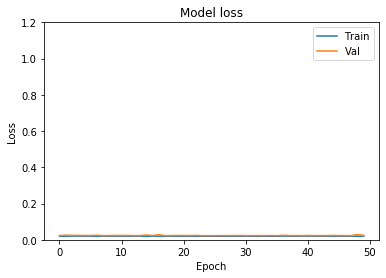

In [14]:
plt.plot(hist_out.history['loss'])
plt.plot(hist_out.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

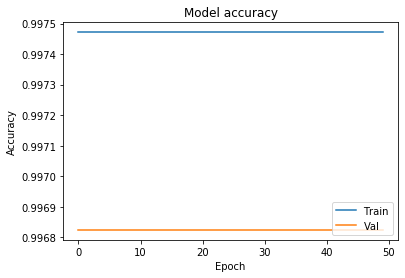

In [15]:
plt.plot(hist_out.history['accuracy'])
plt.plot(hist_out.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [58]:
ftd = train_data[(train_data['Label'] == 'Normal') | 
                              ((train_data['Label'] == 'Pnemonia') & (train_data['Label_2_Virus_category'] == 'COVID-19'))]


# Create a target attribute where value = positive if 'Pnemonia + COVID-19' or value = negative if 'Normal'
ftd['target'] = ['negative' if holder == 'Normal' else 'positive' for holder in ftd['Label']]

ftd= shuffle(ftd, random_state=1)

final_validation_data = ftd.iloc[1000:, :]
ftd = ftd.iloc[:1000, :]

print(f"Final train data shape : {ftd.shape}")
ftd.sample(10)

C:\Users\Micky\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Final train data shape : (1000, 7)


Unnamed: 0           X_ray_image_name   Label Dataset_type  \
719          719  NORMAL2-IM-0564-0001.jpeg  Normal        TRAIN   
164          164          IM-0349-0001.jpeg  Normal        TRAIN   
561          561          IM-0722-0001.jpeg  Normal        TRAIN   
169          169          IM-0343-0001.jpeg  Normal        TRAIN   
1170        1170  NORMAL2-IM-1149-0001.jpeg  Normal        TRAIN   
558          558          IM-0728-0001.jpeg  Normal        TRAIN   
611          611          IM-0752-0001.jpeg  Normal        TRAIN   
256          256          IM-0467-0001.jpeg  Normal        TRAIN   
1286        1286  NORMAL2-IM-1311-0001.jpeg  Normal        TRAIN   
1102        1102  NORMAL2-IM-1064-0001.jpeg  Normal        TRAIN   

     Label_2_Virus_category Label_1_Virus_category    target  
719                     NaN                    NaN  negative  
164                     NaN                    NaN  negative  
561                     NaN                    NaN  negative  
169                     NaN                    NaN  negative  
1170                    NaN                    NaN  negative  
558                     NaN                    NaN  negative  
611                     NaN                    NaN  negative  
256                     NaN                    NaN  negative  
1286                    NaN                    NaN  negative  
1102                    NaN                    NaN  negative

## Selection of appropriate layers

In [50]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
)

train_generator = train_image_generator.flow_from_dataframe(
    dataframe=ftd,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

validation_generator = train_image_generator.flow_from_dataframe(
    dataframe=final_validation_data,
    directory=train_img_dir,
    x_col='X_ray_image_name',
    y_col='target',
    target_size=(224, 224),
    batch_size=16,
    seed=2020,
    shuffle=True,
    class_mode='binary'
)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


## Measurement  of models performance 

### Convolutional Neural Network

In [56]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Dropout(0.5))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)       

## regulization 

## Overall breadth and depth of commentary/ explanations 